# Understanding the Inverse Seesaw in the DLRSM

In this notebook we follow the implementation of the ISS in the work [Low scale left-right symmetry and naturally small neutrino mass](https://link.springer.com/article/10.1007/JHEP02(2019)045)

In [2]:
from sympy import MatrixSymbol, BlockMatrix, init_printing, ZeroMatrix, symbols, Identity, block_collapse
from sympy import DiagonalMatrix
init_printing()

If $m_D^\prime = 0$ and $m_D = \xi M_D$

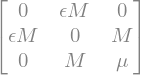

In [3]:
n = 3
MD = MatrixSymbol('M', n,n)
#MD = DiagonalMatrix(MD)
mu = MatrixSymbol(r'mu', n,n)
#mu = DiagonalMatrix(mu)
Z3 = ZeroMatrix(n,n)
I3 = Identity(n)
epsilon = symbols(r'\epsilon', positive=True)


MLRiss_mDp0 = BlockMatrix(
    [
        [Z3, epsilon*MD*I3, Z3],
        [epsilon*MD*I3, Z3, MD*I3],
        [Z3, MD*I3, mu*I3]
    ]
)
MLRiss_mDp0

In [4]:
from sympy import cos, sin, tan

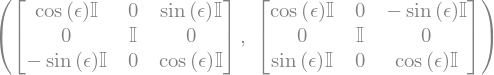

In [5]:

Us = BlockMatrix(
    [
        [cos(epsilon)*I3, Z3, sin(epsilon)*I3],
        [Z3, I3, Z3],
        [-sin(epsilon)*I3, Z3, cos(epsilon)*I3]
    ]
)
UsT = Us.T
Us, UsT

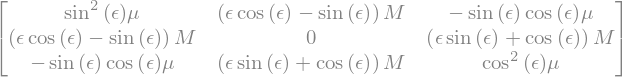

In [6]:
UsTMLRissUs = block_collapse(UsT*MLRiss_mDp0*Us)
UsTMLRissUs

In [7]:
block_collapse(UsTMLRissUs.blocks[0,1])

In [8]:
from sympy import solve, sqrt

In [9]:
sinxi_sol = solve(epsilon*cos(epsilon) - sin(epsilon), sin(epsilon), dict=True)[0]
sinxi_sol

In [10]:
tanxi_sol = {tan(epsilon):(sin(epsilon)/cos(epsilon)).subs(sinxi_sol)}
tanxi_sol

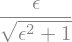

In [11]:
sinxi_approx = epsilon/sqrt(1 + epsilon**2)
sinxi_approx

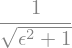

In [12]:
cosxi_approx = 1/sqrt(1 + epsilon**2)
cosxi_approx

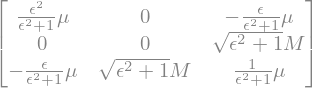

In [13]:
UsTMLRissUs_sym = block_collapse(UsTMLRissUs.subs(sin(epsilon), sinxi_approx).subs(cos(epsilon), cosxi_approx)).simplify()
UsTMLRissUs_sym

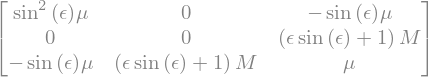

In [14]:
UsTMLRissUs_sym_sinxi = block_collapse(block_collapse(UsTMLRissUs.subs(cos(epsilon), 1)).simplify().subs(epsilon - sin(epsilon), 0))
UsTMLRissUs_sym_sinxi

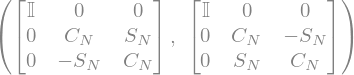

In [15]:
CN = MatrixSymbol('C_N', 3,3)
CNdiag = DiagonalMatrix(CN)
SN = MatrixSymbol('S_N', 3,3)
SNdiag = DiagonalMatrix(SN)
UN = BlockMatrix(
    [
        [I3, Z3, Z3],
        [Z3, CN*I3, SN*I3],
        [Z3, -SN*I3, CN*I3]
    ]
)
UNT = BlockMatrix(
    [
        [I3, Z3, Z3],
        [Z3, CN*I3, -SN*I3],
        [Z3, SN*I3, CN*I3]
    ]
)
UN, UNT

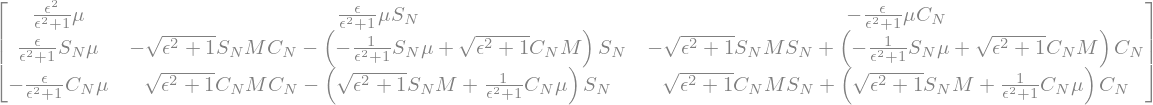

In [16]:
UNTUsTMLRissUsUN = block_collapse(UNT*UsTMLRissUs_sym*UN)#.subs(cos(xi),1)
UNTUsTMLRissUsUN

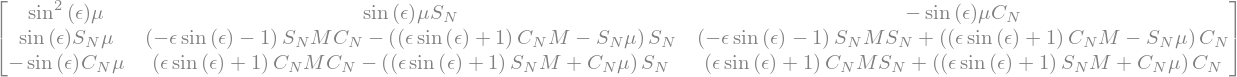

In [17]:
UNTUsTMLRissUsUN_sinxi = block_collapse(UNT*UsTMLRissUs_sym_sinxi*UN)
UNTUsTMLRissUsUN_sinxi

In [18]:
from sympy.physics.quantum import Dagger

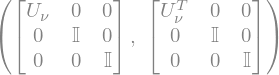

In [19]:
Unu = MatrixSymbol(r'U_{\nu}', 3,3)
Unu_matrix = BlockMatrix(
    [
        [Unu, Z3, Z3],
        [Z3, I3, Z3],
        [Z3, Z3, I3]
    ]
)
Unu_matrixT = BlockMatrix(
    [
        [Unu.T, Z3, Z3],
        [Z3, I3, Z3],
        [Z3, Z3, I3]
    ]
)
Unu_matrix, Unu_matrixT

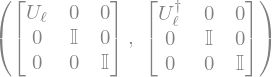

In [20]:
Ul = MatrixSymbol(r'U_{\ell}', 3,3)
Ul_matrix = BlockMatrix(
    [
        [Ul, Z3, Z3],
        [Z3, I3, Z3],
        [Z3, Z3, I3]
    ]
)
Ul_matrixDagger = BlockMatrix(
    [
        [Dagger(Ul), Z3, Z3],
        [Z3, I3, Z3],
        [Z3, Z3, I3]
    ]
)
Ul_matrix, Ul_matrixDagger

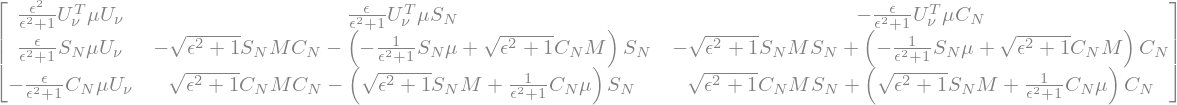

In [21]:
UnuTUNTUsTMLRissUsUNUnu = block_collapse(Unu_matrixT*UNTUsTMLRissUsUN*Unu_matrix)
UnuTUNTUsTMLRissUsUNUnu

In [22]:
from sympy import pi

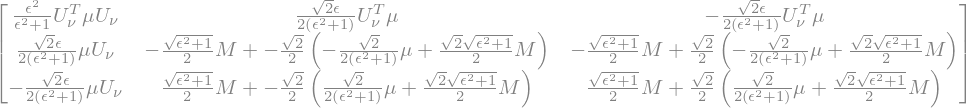

In [23]:
UnuTUNTUsTMLRissUsUNUnu = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu.subs(CN, cos(pi/4)*I3).subs(
        SN, sin(pi/4)*I3
    )
)
UnuTUNTUsTMLRissUsUNUnu

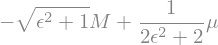

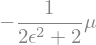

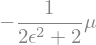

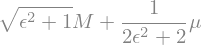

In [24]:
for i in range(1,3):
    for j in range(1,3):
        blij = UnuTUNTUsTMLRissUsUNUnu.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu = UnuTUNTUsTMLRissUsUNUnu.subs(blij, blij_collapsed) 

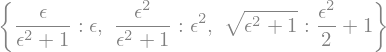

In [25]:
xi_approximations = {
    (sin(epsilon)**2).subs(sin(epsilon), sinxi_approx): (sin(epsilon)**2).subs(sin(epsilon), sinxi_approx).series(epsilon, 0, 3).removeO(),
    epsilon/(1 + epsilon**2): (epsilon/(1 + epsilon**2)).series(epsilon, 0, 3).removeO(),
    sqrt(1 + epsilon**2):(sqrt(1 + epsilon**2)).series(epsilon, 0, 3).removeO()
}
xi_approximations

In [26]:
UnuDaggerUNTUsTMLRissUsUNUnu = UnuTUNTUsTMLRissUsUNUnu.subs(xi_approximations)

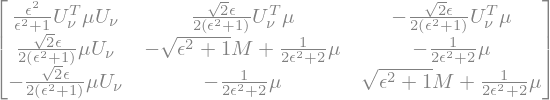

In [27]:
UnuTUNTUsTMLRissUsUNUnu

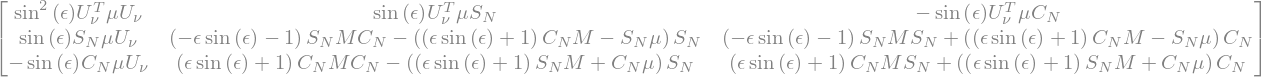

In [28]:
UnuTUNTUsTMLRissUsUNUnu_sinxi = block_collapse(Unu_matrixT*UNTUsTMLRissUsUN_sinxi*Unu_matrix)
UnuTUNTUsTMLRissUsUNUnu_sinxi

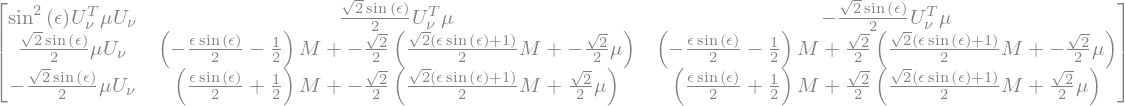

In [29]:
UnuTUNTUsTMLRissUsUNUnu_sinxi = block_collapse(UnuTUNTUsTMLRissUsUNUnu_sinxi.subs(CN, cos(pi/4)*I3).subs(SN, sin(pi/4)*I3))
UnuTUNTUsTMLRissUsUNUnu_sinxi

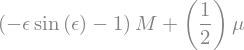

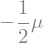

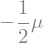

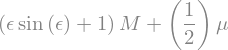

In [30]:
for i in range(1,3):
    for j in range(1,3):
        blij = UnuTUNTUsTMLRissUsUNUnu_sinxi.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu_sinxi = UnuTUNTUsTMLRissUsUNUnu_sinxi.subs(blij, blij_collapsed) 

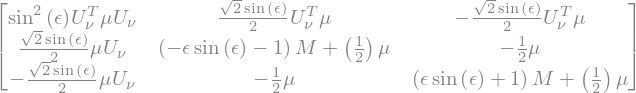

In [31]:
UnuTUNTUsTMLRissUsUNUnu_sinxi

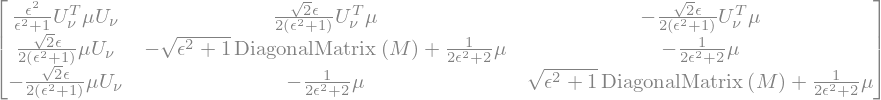

In [32]:
UnuTUNTUsTMLRissUsUNUnu_diag = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu.subs(
    MD, DiagonalMatrix(MD)
)
)
UnuTUNTUsTMLRissUsUNUnu_diag

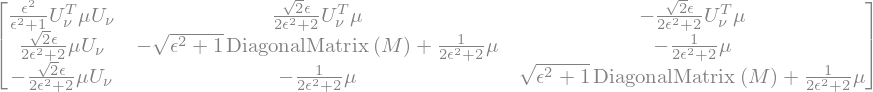

In [33]:
mnu = DiagonalMatrix(MatrixSymbol(r'm_\nu',3,3))
UnuTUNTUsTMLRissUsUNUnu_diag = UnuTUNTUsTMLRissUsUNUnu_diag.subs(
    epsilon**2*Unu.T*mu*Unu, mnu
    #mu,(1/epsilon**2)*Unu*mnu*Unu.T
)
UnuTUNTUsTMLRissUsUNUnu_diag

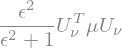

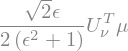

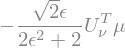

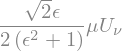

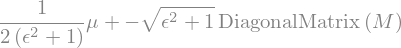

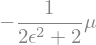

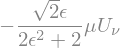

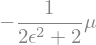

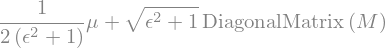

In [34]:
for i in range(0,3):
    for j in range(0,3):
        blij = UnuTUNTUsTMLRissUsUNUnu_diag.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu_diag= UnuTUNTUsTMLRissUsUNUnu_diag.subs(blij, blij_collapsed) 

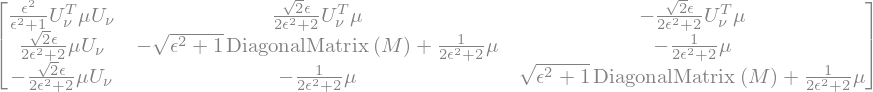

In [35]:
UnuTUNTUsTMLRissUsUNUnu_diag.subs(Unu.T*Unu, I3)

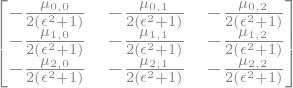

In [36]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag.blocks[1,2]).as_explicit().applyfunc(lambda x:x.factor())

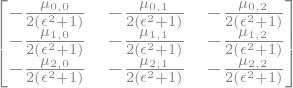

In [37]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag.blocks[2,1]).as_explicit().applyfunc(lambda x:x.factor())

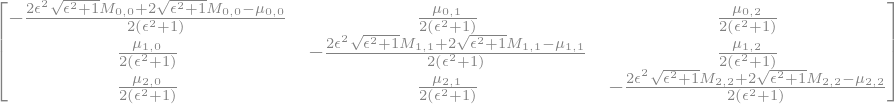

In [38]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag.blocks[1,1]).as_explicit().applyfunc(lambda x:x.factor())

In [39]:
#zeta = symbols(r'\zeta')
#Uzeta = BlockMatrix(
#    [
#        [In, Z1, Z1],
#        [Z1, cos(zeta)*In, -sin(zeta)*In],
#        [Z1, sin(zeta)*In, cos(zeta)*In]
#    ]
#)
#Uzeta

In [40]:
#UZTMUZM = block_collapse(Uzeta.T*block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag.subs(xi,0))*Uzeta)
#UZTMUZM

In [41]:
#block_collapse(UZTMUZM.blocks[2,2]).as_explicit().applyfunc(lambda x:x.factor().trigsimp().subs(zeta, pi/4))

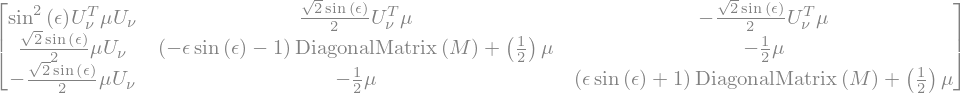

In [42]:
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu_sinxi.subs(
    MD, DiagonalMatrix(MD)
)#.subs(CN, cos(pi/4)*In).subs(SN, sin(pi/4)*In)
)
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi

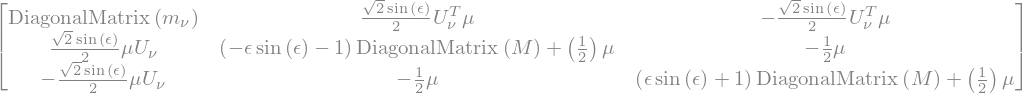

In [43]:
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(
    sin(epsilon)**2*Unu.T*mu*Unu, mnu
    #mu,(1/sin(epsilon)**2)*Unu*mnu*Unu.T
)
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi

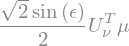

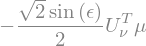

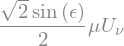

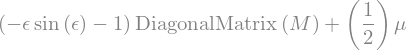

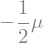

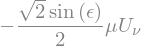

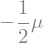

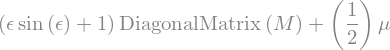

In [44]:
for i in range(0,3):
    for j in range(0,3):
        blij = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu_diag_sinxi= UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(blij, blij_collapsed) 

In [45]:
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(Unu.T*Unu, I3)

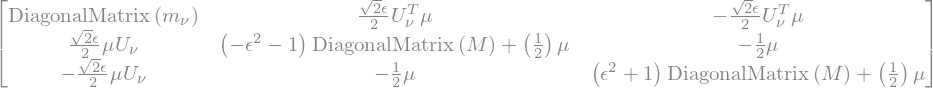

In [46]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(sin(epsilon), epsilon))

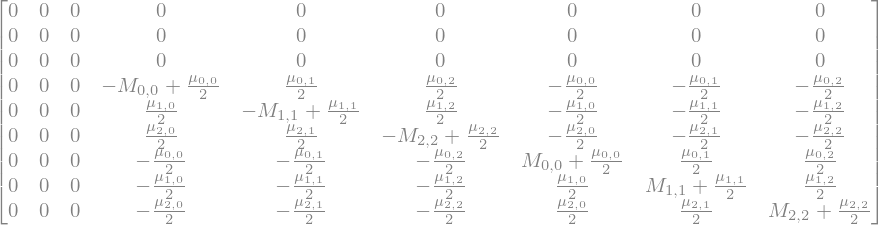

In [47]:
UnuTUNTUsTMLRissUsUNUnu_explicit = UnuTUNTUsTMLRissUsUNUnu_diag.subs(epsilon, 0).as_explicit()
UnuTUNTUsTMLRissUsUNUnu_explicit

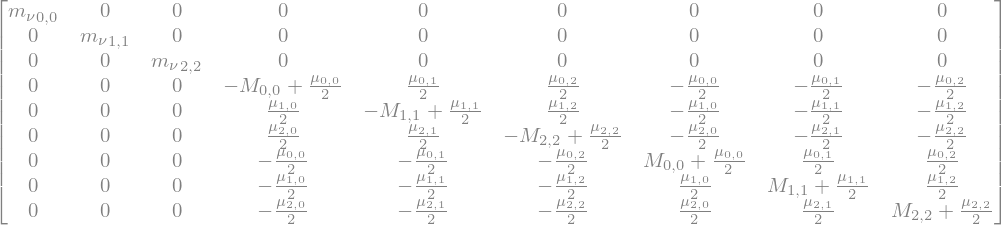

In [48]:
UnuTUNTUsTMLRissUsUNUnu_explicit_sinxi = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(epsilon, 0).as_explicit()
UnuTUNTUsTMLRissUsUNUnu_explicit_sinxi

In [49]:
SNi_changes = {
    SNdiag[0,0]:(1-(mu[0,0])/(4*MD[0,0]))/sqrt(2),
    SNdiag[1,1]:(1-(mu[1,1])/(4*MD[1,1]))/sqrt(2),
    SNdiag[2,2]:(1-(mu[2,2])/(4*MD[2,2]))/sqrt(2)
}

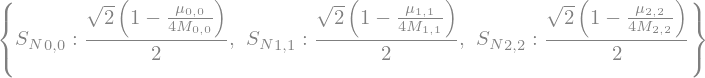

In [50]:
SNi_changes

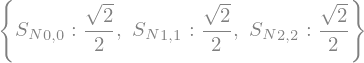

In [51]:
SNi_changes0 = {}
for sn in SNi_changes:
    SNi_changes0[sn] = sin(pi/4)
SNi_changes0

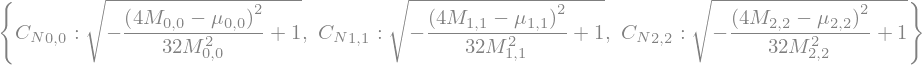

In [52]:
CNi_changes = {}
for key, sn in SNi_changes.items():
    cn = sqrt((1 - sn.simplify()**2).simplify())
    CNi_changes[key.replace(SN, CN)] = cn
CNi_changes

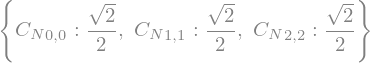

In [53]:
CNi_changes1 = {}
for cn in CNi_changes:
    CNi_changes1[cn] = cos(pi/4)
CNi_changes1

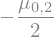

In [54]:
UnuTUNTUsTMLRissUsUNUnu_explicit[3,-1].subs(SNi_changes0).subs(CNi_changes1)#.args[4].args[-1].args

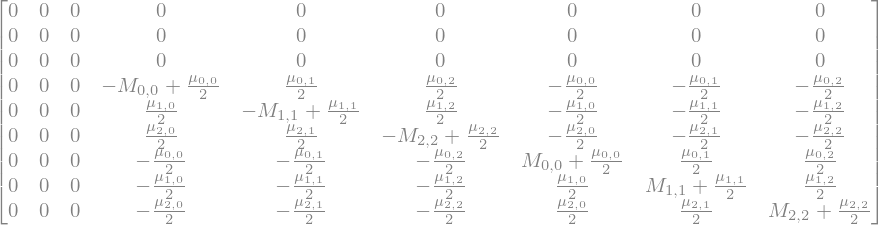

In [55]:
Mblock = UnuTUNTUsTMLRissUsUNUnu_explicit.subs(
    SNi_changes0
).subs(
    CNi_changes1
).applyfunc(lambda x:x.expand()).applyfunc(block_collapse)#.subs(xi, 0)
Mblock

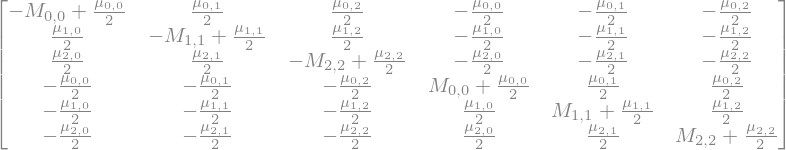

In [56]:
Mblock[3:,3:]

In [57]:
from sympy import eye

In [58]:
Upmns_unitary_relations = {
    key:value for key, value in zip(
        list((Unu.T*Unu).as_explicit()),
        list(eye(3))
    )
}
Upmns_unitary_relations

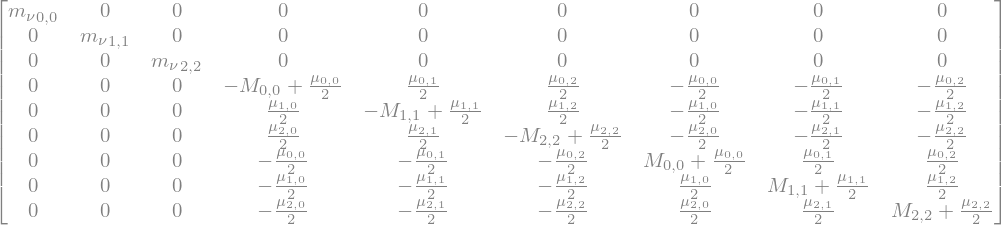

In [59]:
UnuTUNTUsTMLRissUsUNUnu_explicit_sinxi.subs(
    SNi_changes0
).subs(
    CNi_changes1
).applyfunc(lambda x:x.expand()).subs(
    sin(epsilon), epsilon
)#.subs(xi**2, 0)

In [60]:
from sympy import conjugate

The PMNS matrix is given by
$$U_\text{PMNS} = U_\ell^\dagger U_\nu^*$$
$$U_\text{PMNS}^\dagger = U_\nu^\top U_\ell$$
$$U_\text{PMNS}^\dagger U_\text{PMNS} = U_\nu^\top U_\ell U_\ell^\dagger U_\nu^* = U_\nu^\top U_\nu^*=(U_\nu^\dagger U_\nu)^* = I^* = I$$

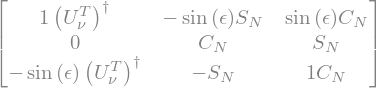

In [61]:
U = block_collapse(Us*UN*conjugate(Unu_matrix)).subs(cos(epsilon), 1)
U

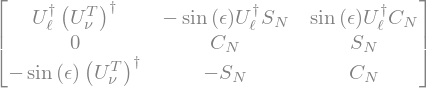

In [62]:
Uf = block_collapse((Dagger(Ul_matrix)*Us*UN*conjugate(Unu_matrix)).subs(cos(epsilon), 1))
Uf

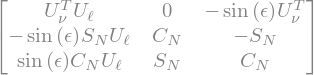

In [63]:
Ufinv = block_collapse((Unu_matrix.T*UNT*UsT*Ul_matrix).subs(cos(epsilon), 1))
Ufinv

$$U_\nu^\dagger (U_\ell^\top)^\dagger = (U_\ell^\top U_\nu)^\dagger=(U_\ell^\dagger U_\nu^*)^\top$$
$$U_\nu^\top (U_\ell) = (U_\ell^\top U_\nu)^\top = (U_\ell^\dagger U_\nu^*)^\dagger$$
$$U_\nu^\top (U_\nu^\top)^\dagger = U_\nu^\top U_\nu^* = (U_\nu^\dagger U_\nu)^* = I^* = I$$

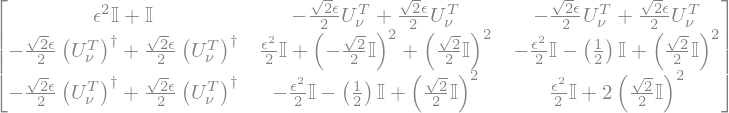

In [64]:
Upmns = MatrixSymbol(r'U_{\text{PMNS}}', 3,3)

UfinvUf = block_collapse(
    (Ufinv*Uf).subs(
        sin(epsilon), epsilon
    ).replace(
        CN, cos(pi/4)*I3
    ).replace(
        SN, sin(pi/4)*I3
    ).subs(Dagger(Ul)*conjugate(Unu), Upmns).subs(Unu.T*Ul, Dagger(Upmns))
).subs(
    Ul*Upmns, conjugate(Unu)
).subs(
    Dagger(Upmns)*Dagger(Ul), Unu.T
).subs(
    Unu.T*Unu, I3
).subs(
    Ul*Dagger(Ul), I3
).subs(
    Unu.T*conjugate(Unu),I3
).subs(
    Dagger(Upmns)*Upmns, I3
)
UfinvUf


In [65]:
for i in range(0,3):
    for j in range(0,3):
        blij = UfinvUf.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand())
        #display(blij_collapsed)
        UfinvUf = UfinvUf.subs(blij, blij_collapsed) 

In [66]:
block_collapse(
    UfinvUf.subs((sqrt(2)/2*In)**2, In/2).subs((-sqrt(2)/2*In)**2, In/2).subs(epsilon, 0)
)

TypeError: can't multiply sequence by non-int of type 'Mul'

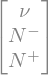

In [67]:
nu = MatrixSymbol(r'\nu', 3,1)
Nm = MatrixSymbol('N^-', 3,1)
Np = MatrixSymbol('N^+', 3,1)
Nu = BlockMatrix(
    [
        [nu],
        [Nm],
        [Np]
    ]
)
Nu

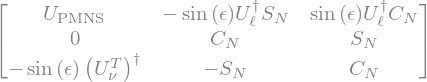

In [68]:
Uf.subs(Dagger(Ul)*conjugate(Unu), Upmns)

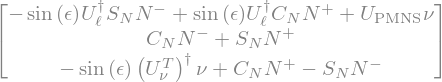

In [69]:
Nuweak = block_collapse(Uf*Nu).subs(Dagger(Ul)*conjugate(Unu), Upmns).factor()
Nuweak

In [70]:
#block_collapse(Nuweak.blocks[0].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

In [71]:
#Nuweak.blocks[0].replace(CN, cos(pi)/4*In).replace(SN, sin(pi)/4*In).as_explicit(

#)

In [72]:
#block_collapse(Nuweak.blocks[1].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

In [73]:
#block_collapse(Nuweak.blocks[2].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

In [74]:
#Uf_explicit = Uf.subs(Dagger(Ul)*conjugate(Unu), Upmns).subs(sin(epsilon), epsilon).replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In).as_explicit()
#Uf_explicit

In [75]:
#Uf_explicit.subs(epsilon, 0)

In [76]:
#Nu.as_explicit()

In [77]:
#(Uf_explicit*Nu.as_explicit()).applyfunc(lambda x:x.factor())

## Second approach

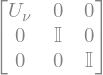

In [78]:
Unu_matrix

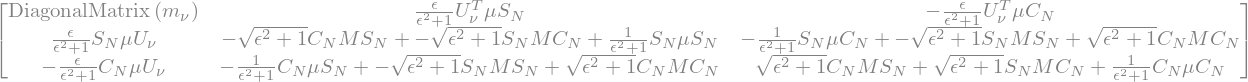

In [79]:

UnuTUNTUsTMLRissUsUNUnu2 = block_collapse(
    block_collapse(Unu_matrixT*UNTUsTMLRissUsUN*Unu_matrix).expand().subs(
        ((epsilon**2)/(1 + epsilon**2))*Unu.T*mu*Unu, mnu
    )#.subs(xi_approximations)
)
UnuTUNTUsTMLRissUsUNUnu2

In [80]:
from sympy import I

In [81]:
Oi = BlockMatrix(
    [
        [I3, Z3, Z3],
        [Z3, I*I3, Z3],
        [Z3, Z3, I3]
    ]
)
UnuTUNTUsTMLRissUsUNUnu2 = block_collapse(
    Oi*UnuTUNTUsTMLRissUsUNUnu2*Oi.T
)

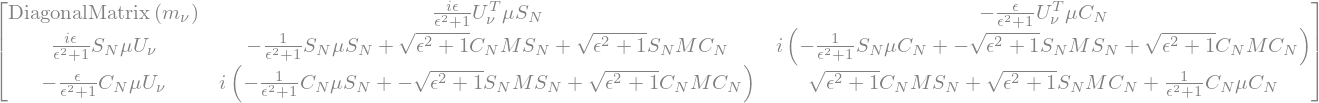

In [82]:
UnuTUNTUsTMLRissUsUNUnu2

In [83]:
th1 = symbols(r'\theta_1')
th2 = symbols(r'\theta_2')
th3 = symbols(r'\theta_3')

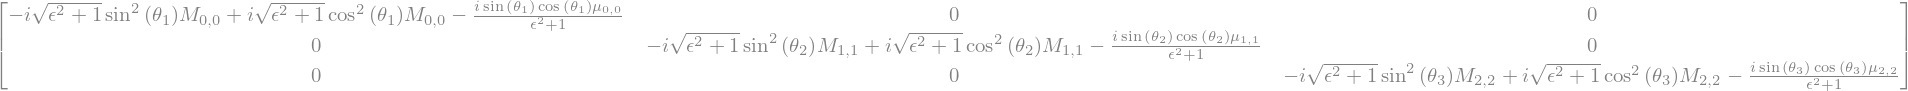

In [84]:
UnuTUNTUsTMLRissUsUNUnu2_12 = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu2.blocks[2,1].subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu2_12

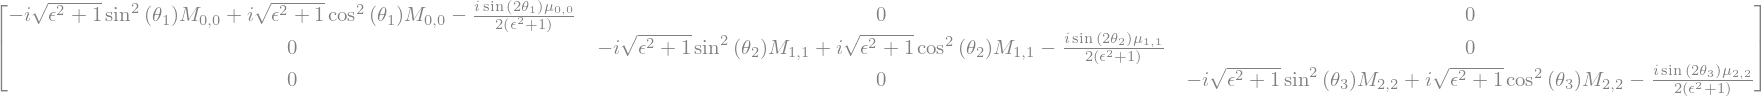

In [85]:
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp = UnuTUNTUsTMLRissUsUNUnu2_12.applyfunc(lambda x:x.trigsimp())
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp

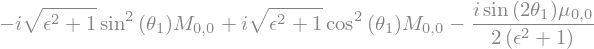

In [86]:
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th1 = UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp[0,0]
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th2 = UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp[1,1]
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th3 = UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp[2,2]
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th1

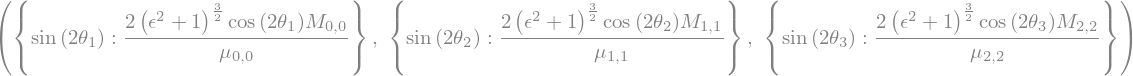

In [87]:
sin2th1_sol = solve(UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th1, sin(2*th1), dict=True)[0]
sin2th2_sol = solve(UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th2, sin(2*th2), dict=True)[0]
sin2th3_sol = solve(UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th3, sin(2*th3), dict=True)[0]
sin2th1_sol, sin2th2_sol, sin2th3_sol

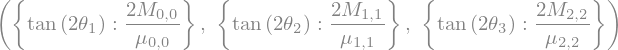

In [88]:
tan2th1_sol = {tan(2*th1):(sin2th1_sol[sin(2*th1)]/cos(2*th1)).subs(epsilon, 0)}
tan2th2_sol = {tan(2*th2):(sin2th2_sol[sin(2*th2)]/cos(2*th2)).subs(epsilon, 0)}
tan2th3_sol = {tan(2*th3):(sin2th3_sol[sin(2*th3)]/cos(2*th3)).subs(epsilon, 0)}
tan2th1_sol, tan2th2_sol, tan2th3_sol

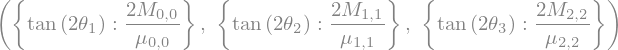

In [89]:
tan2th1_sol[tan(2*th1)] = tan2th1_sol[tan(2*th1)].series(epsilon, 0, 3).removeO().factor()
tan2th2_sol[tan(2*th2)] = tan2th2_sol[tan(2*th2)].series(epsilon, 0, 3).removeO().factor()
tan2th3_sol[tan(2*th3)] = tan2th3_sol[tan(2*th3)].series(epsilon, 0, 3).removeO().factor()
tan2th1_sol, tan2th2_sol, tan2th3_sol

In [90]:
from sympy import fraction

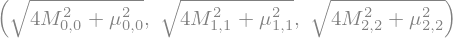

In [91]:
co2th1, ca2th1 = fraction(tan2th1_sol[tan(2*th1)])
h2th1 = sqrt(co2th1**2 + ca2th1**2)
co2th2, ca2th2 = fraction(tan2th2_sol[tan(2*th2)])
h2th2 = sqrt(co2th2**2 + ca2th2**2)
co2th3, ca2th3 = fraction(tan2th3_sol[tan(2*th3)])
h2th3 = sqrt(co2th3**2 + ca2th3**2)
h2th1, h2th2, h2th3

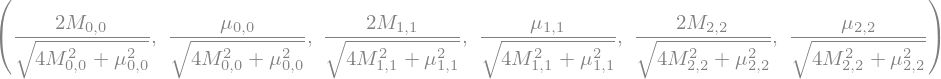

In [92]:
sin2th1 = (co2th1/h2th1).series(epsilon, 0, 3).removeO().factor()
cos2th1 = (ca2th1/h2th1).series(epsilon, 0, 3).removeO().factor()
sin2th2 = (co2th2/h2th2).series(epsilon, 0, 3).removeO().factor()
cos2th2 = (ca2th2/h2th2).series(epsilon, 0, 3).removeO().factor()
sin2th3 = (co2th3/h2th3).series(epsilon, 0, 3).removeO().factor()
cos2th3 = (ca2th3/h2th3).series(epsilon, 0, 3).removeO().factor()
sin2th1, cos2th1, sin2th2, cos2th2, sin2th3, cos2th3

Remembering the identity
$$\tan \theta = \frac{1 - \cos{2 \theta}}{\sin{2 \theta}}$$

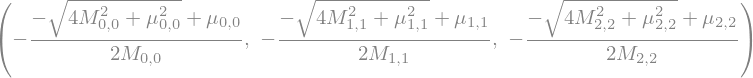

In [93]:
tanth1 = ((1 - cos2th1)/sin2th1).series(epsilon, 0, 3).removeO().factor()
tanth2 = ((1 - cos2th2)/sin2th2).series(epsilon, 0, 3).removeO().factor()
tanth3 = ((1 - cos2th3)/sin2th3).series(epsilon, 0, 3).removeO().factor()
tanth1, tanth2, tanth3

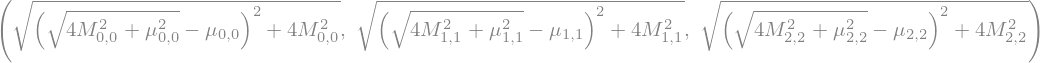

In [94]:
coth1, cath1 = fraction(tanth1)
hth1 = sqrt(coth1**2 + cath1**2)
coth2, cath2 = fraction(tanth2)
hth2 = sqrt(coth2**2 + cath2**2)
coth3, cath3 = fraction(tanth3)
hth3 = sqrt(coth3**2 + cath3**2)
hth1, hth2, hth3

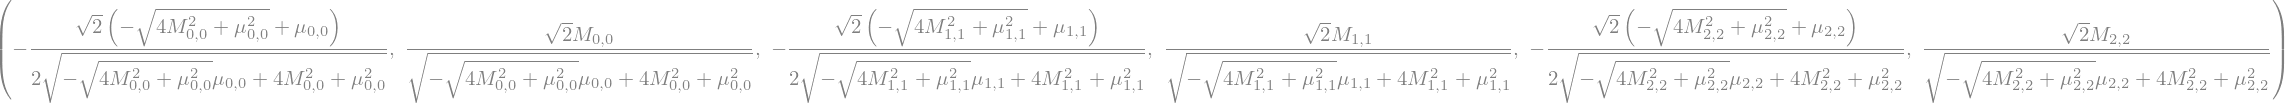

In [95]:
sinth1 = (coth1/hth1).series(epsilon, 0, 3).removeO().factor()
costh1 = (cath1/hth1).series(epsilon, 0, 3).removeO().factor()
sinth2 = (coth2/hth2).series(epsilon, 0, 3).removeO().factor()
costh2 = (cath2/hth2).series(epsilon, 0, 3).removeO().factor()
sinth3 = (coth3/hth3).series(epsilon, 0, 3).removeO().factor()
costh3 = (cath3/hth3).series(epsilon, 0, 3).removeO().factor()
sinth1, costh1, sinth2, costh2, sinth3, costh3

In [96]:
from sympy import Dummy

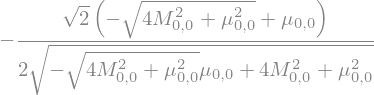

In [97]:
sinth1

$$r = \frac{\mu_{ii}}{2 M_{Di}}$$

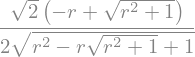

In [98]:
r = symbols('r', positive=True)
mupos = Dummy('mu', positive=True)
sinth1.subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0])

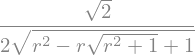

In [99]:
costh1.subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0])

In [100]:
tanth1 = (sinth1/costh1).subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).factor(deep=True)
tanth1

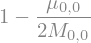

In [101]:
tanth1.subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).series(r, 0, 2).removeO().factor().subs(r, mu[0,0]/(2*MD[0,0])).expand()

In [102]:
tan(pi/4)

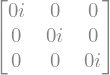

In [103]:
UnuTUNTUsTMLRissUsUNUnu2_12.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(epsilon, 0).factor())

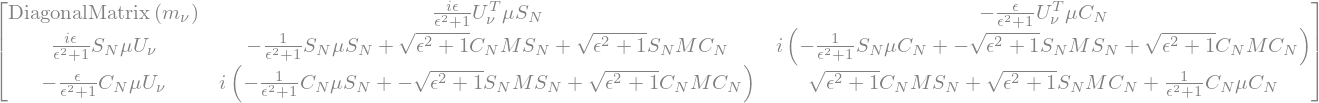

In [104]:
UnuTUNTUsTMLRissUsUNUnu2

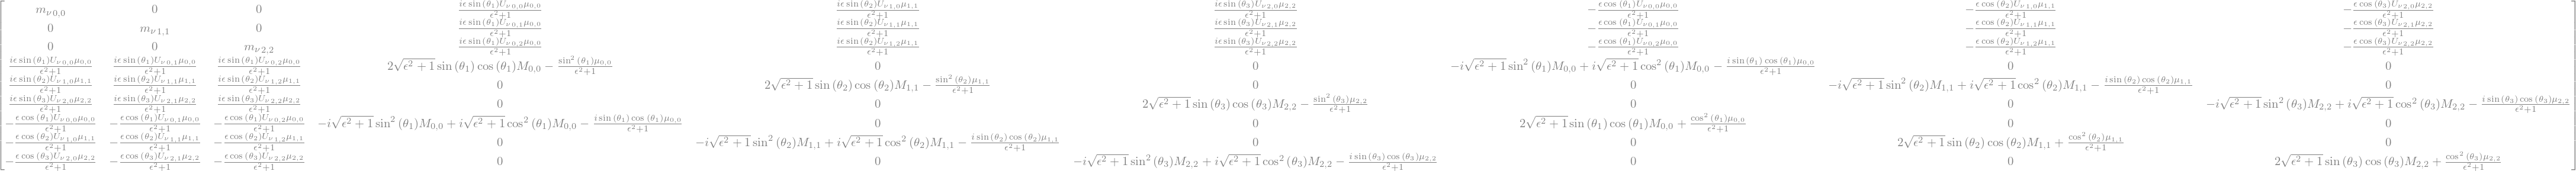

In [105]:
UnuTUNTUsTMLRissUsUNUnu2_explicit = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu2.subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu2_explicit.applyfunc(lambda x:x.collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor()))

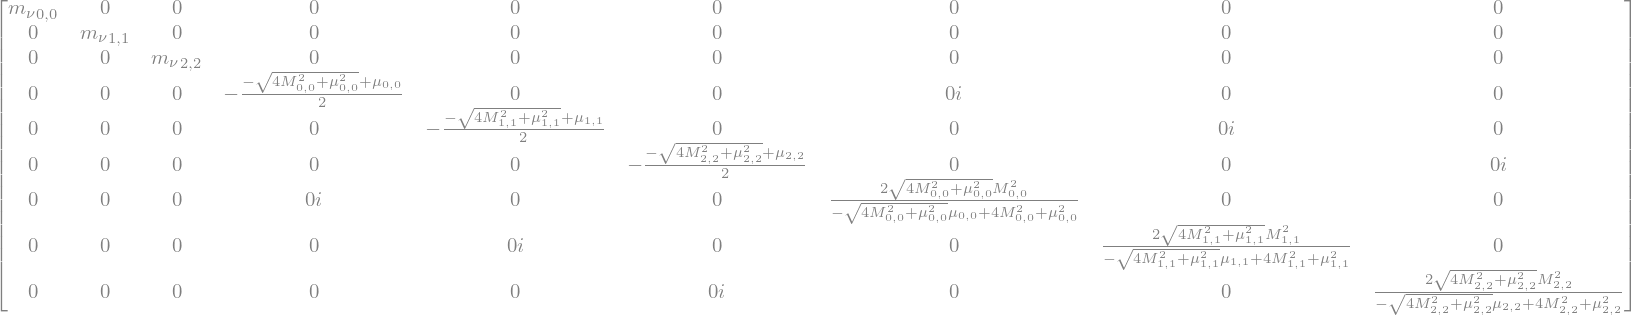

In [106]:
eigenvalsMnu = UnuTUNTUsTMLRissUsUNUnu2_explicit.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(epsilon,0).factor())
eigenvalsMnu

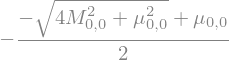

In [107]:
eigenvalsMnu[3,3]

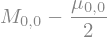

In [108]:
eigenvalsMnu[3,3].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).replace(
    r**2,0
).subs(r, mu[0,0]/(2*MD[0,0])).expand()

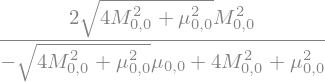

In [109]:
eigenvalsMnu[6,6]

In [110]:
eigenvalsMnu[6,6].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(
    mupos, mu[0,0]
).replace(
    r**2,0
).expand().replace(
    r**2,0
).subs(r, mu[0,0]/(2*MD[0,0]))

In [111]:
(eigenvalsMnu[3,3] - eigenvalsMnu[6,6]).factor()

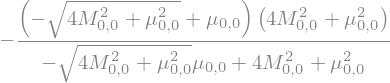

In [112]:
(eigenvalsMnu[3,3] + eigenvalsMnu[6,6]).factor()

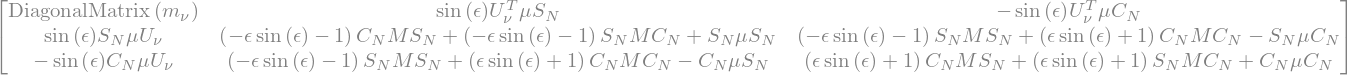

In [113]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2 = block_collapse(
    block_collapse(Unu_matrixT*UNTUsTMLRissUsUN_sinxi*Unu_matrix).expand().subs(
        (sin(epsilon)**2)*Unu.T*mu*Unu, mnu
    )#.subs(xi_approximations)
)
UnuTUNTUsTMLRissUsUNUnu_sinxi2

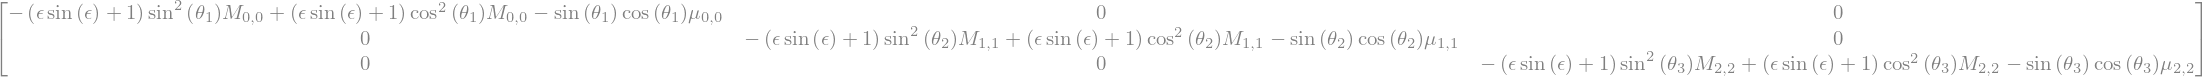

In [114]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12 = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu_sinxi2.blocks[2,1].subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12

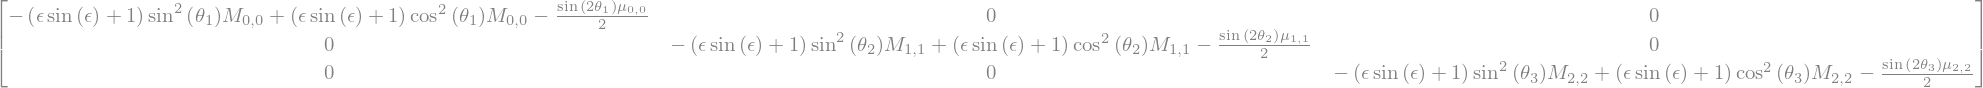

In [115]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12.applyfunc(lambda x:x.trigsimp())
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp

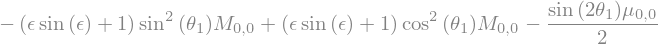

In [116]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th1 = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp[0,0]
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th2 = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp[1,1]
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th3 = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp[2,2]
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th1

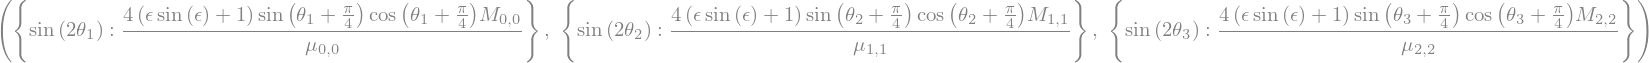

In [117]:
sin2th1_sol_sinxi = solve(UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th1, sin(2*th1), dict=True)[0]
sin2th2_sol_sinxi = solve(UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th2, sin(2*th2), dict=True)[0]
sin2th3_sol_sinxi = solve(UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th3, sin(2*th3), dict=True)[0]
sin2th1_sol_sinxi, sin2th2_sol_sinxi, sin2th3_sol_sinxi

In [118]:
from sympy import Function

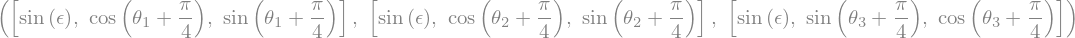

In [119]:
trig_sin2th1 = list(sin2th1_sol_sinxi[sin(2*th1)].atoms(Function))#.remove(sin(epsilon))
trig_sin2th2 = list(sin2th2_sol_sinxi[sin(2*th2)].atoms(Function))#.remove(sin(epsilon))
trig_sin2th3 = list(sin2th3_sol_sinxi[sin(2*th3)].atoms(Function))#.remove(sin(epsilon))
trig_sin2th1, trig_sin2th2, trig_sin2th3

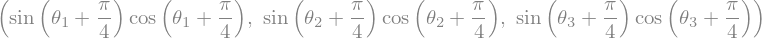

In [120]:
mul_sin2th1 = 1
for trig in trig_sin2th1:
    if not trig.has(epsilon):
        mul_sin2th1 *= trig
mul_sin2th2 = 1
for trig in trig_sin2th2:
    if not trig.has(epsilon):
        mul_sin2th2 *= trig
mul_sin2th3 = 1
for trig in trig_sin2th3:
    if  not trig.has(epsilon):
        mul_sin2th3 *= trig
mul_sin2th1, mul_sin2th2, mul_sin2th3

In [121]:
sin2th1_sol_sinxi[sin(2*th1)] = sin2th1_sol_sinxi[sin(2*th1)].subs(mul_sin2th1, mul_sin2th1.trigsimp())
sin2th2_sol_sinxi[sin(2*th2)] = sin2th2_sol_sinxi[sin(2*th2)].subs(mul_sin2th2, mul_sin2th2.trigsimp())
sin2th3_sol_sinxi[sin(2*th3)] = sin2th3_sol_sinxi[sin(2*th3)].subs(mul_sin2th3, mul_sin2th3.trigsimp())


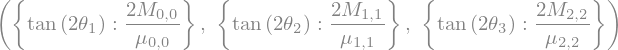

In [122]:
tan2th1_sol_sinxi = {tan(2*th1):(sin2th1_sol_sinxi[sin(2*th1)]/cos(2*th1)).subs(epsilon, 0)}
tan2th2_sol_sinxi = {tan(2*th2):(sin2th2_sol_sinxi[sin(2*th2)]/cos(2*th2)).subs(epsilon, 0)}
tan2th3_sol_sinxi = {tan(2*th3):(sin2th3_sol_sinxi[sin(2*th3)]/cos(2*th3)).subs(epsilon, 0)}
tan2th1_sol, tan2th2_sol, tan2th3_sol

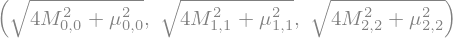

In [123]:
co2th1_sinxi, ca2th1_sinxi = fraction(tan2th1_sol_sinxi[tan(2*th1)])
h2th1_sinxi = sqrt(co2th1_sinxi**2 + ca2th1_sinxi**2)
co2th2_sinxi, ca2th2_sinxi = fraction(tan2th2_sol_sinxi[tan(2*th2)])
h2th2_sinxi = sqrt(co2th2_sinxi**2 + ca2th2_sinxi**2)
co2th3_sinxi, ca2th3_sinxi = fraction(tan2th3_sol_sinxi[tan(2*th3)])
h2th3_sinxi = sqrt(co2th3_sinxi**2 + ca2th3_sinxi**2)
h2th1_sinxi, h2th2_sinxi, h2th3_sinxi

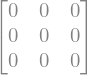

In [124]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(epsilon, 0).factor())

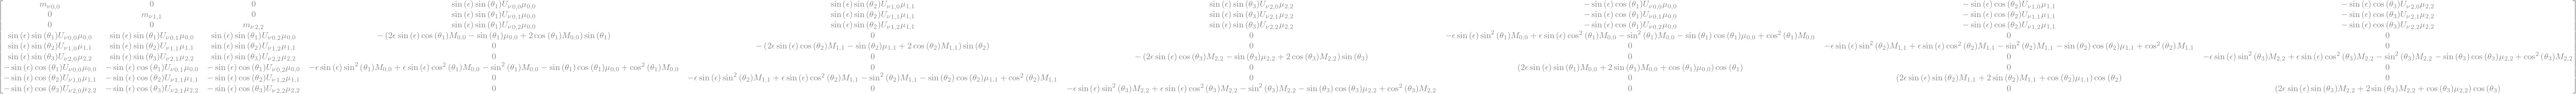

In [125]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_explicit = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu_sinxi2.subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu_sinxi2_explicit.applyfunc(lambda x:x.collect([sin(epsilon)], lambda x:x.factor()))

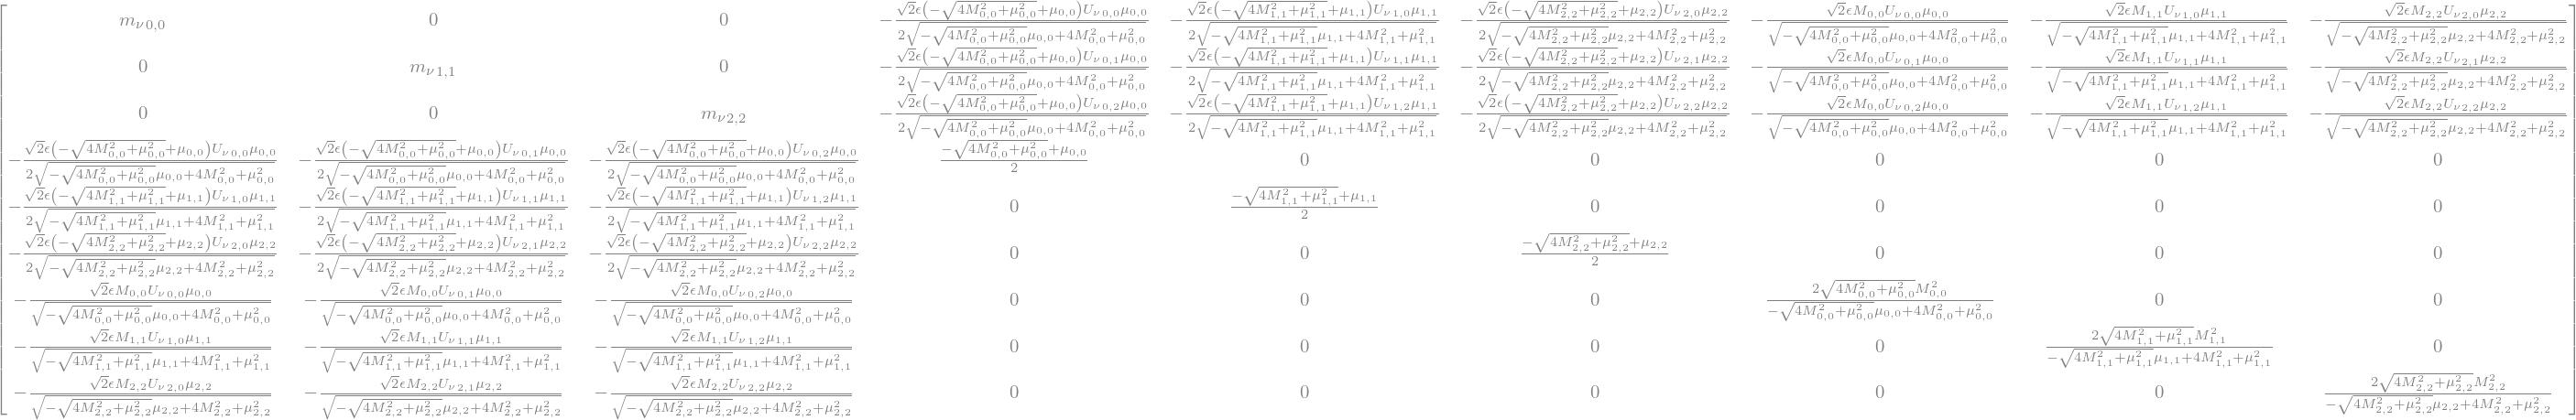

In [126]:
eigenvalsMnu_sinxi = UnuTUNTUsTMLRissUsUNUnu_sinxi2_explicit.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(sin(epsilon), epsilon).replace(epsilon**2, 0).factor())
eigenvalsMnu_sinxi

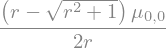

In [127]:
Mnu4 = eigenvalsMnu_sinxi[3, 3].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).simplify()
Mnu4

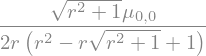

In [128]:
Mnu7 = eigenvalsMnu_sinxi[6, 6].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).simplify()
Mnu7

In [129]:
(Mnu4 + Mnu7).simplify()

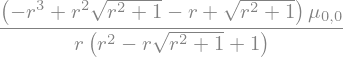

In [130]:
(Mnu7 - Mnu4).simplify()

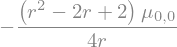

In [131]:
Mnu4_approx = Mnu4.series(r, 0, 2).removeO().factor()
Mnu4_approx

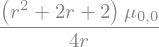

In [132]:
Mnu7_approx = Mnu7.series(r, 0, 2).removeO().factor()
Mnu7_approx

In [133]:
(Mnu4_approx + Mnu7_approx).simplify()

In [134]:
t = 246/1e5
t, t**2

### Physical states

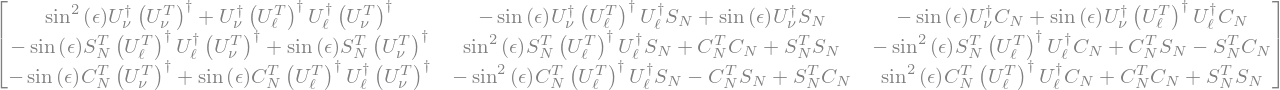

In [135]:
block_collapse(Uf.T*Uf).subs(Dagger(Ul)*conjugate(Ul), Upmns)

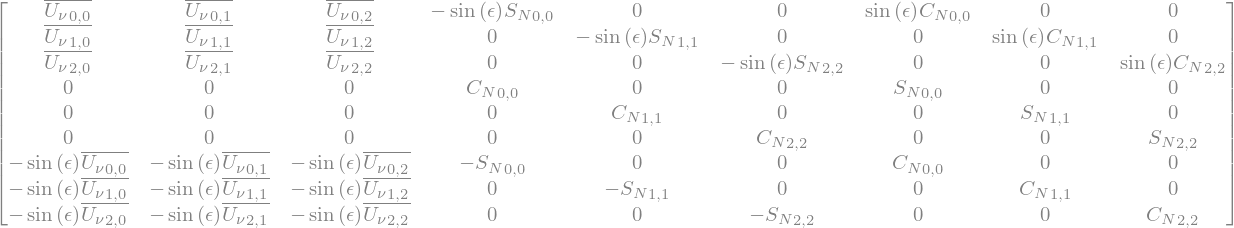

In [136]:
U_exp = U.subs(Dagger(Ul)*conjugate(Unu), Upmns).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand().as_explicit()
Uf_exp = Uf.subs(Dagger(Ul)*conjugate(Unu), Upmns).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand().as_explicit()
U_exp

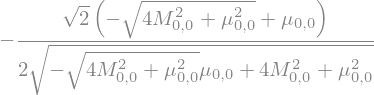

In [137]:
sinth1

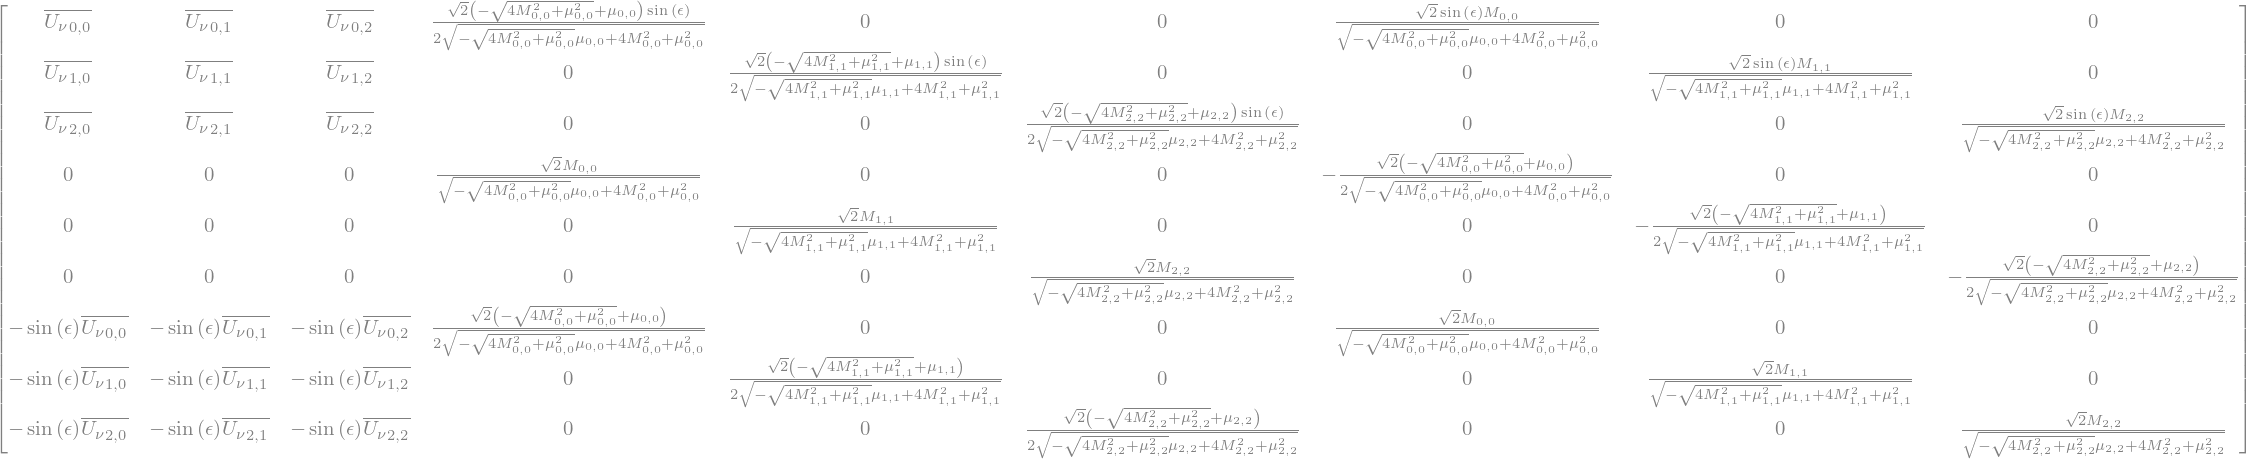

In [138]:
U_exp2 = U_exp.applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())).subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.expand().collect([Nm[0,0], Nm[1,0], Nm[2,0]], lambda x:x.factor()))
U_exp2

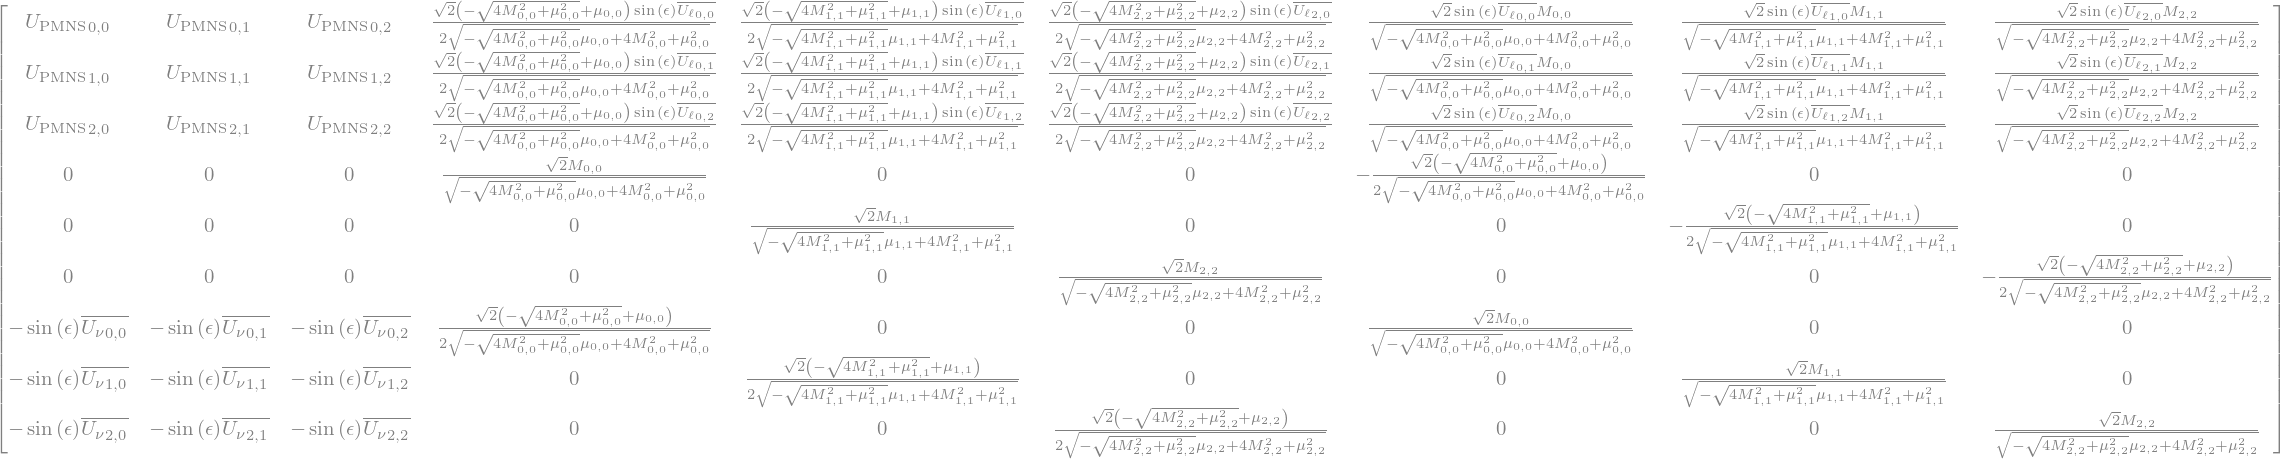

In [139]:
Uf_exp2 = Uf_exp.applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())).subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.expand().collect([Nm[0,0], Nm[1,0], Nm[2,0]], lambda x:x.factor()))
Uf_exp2

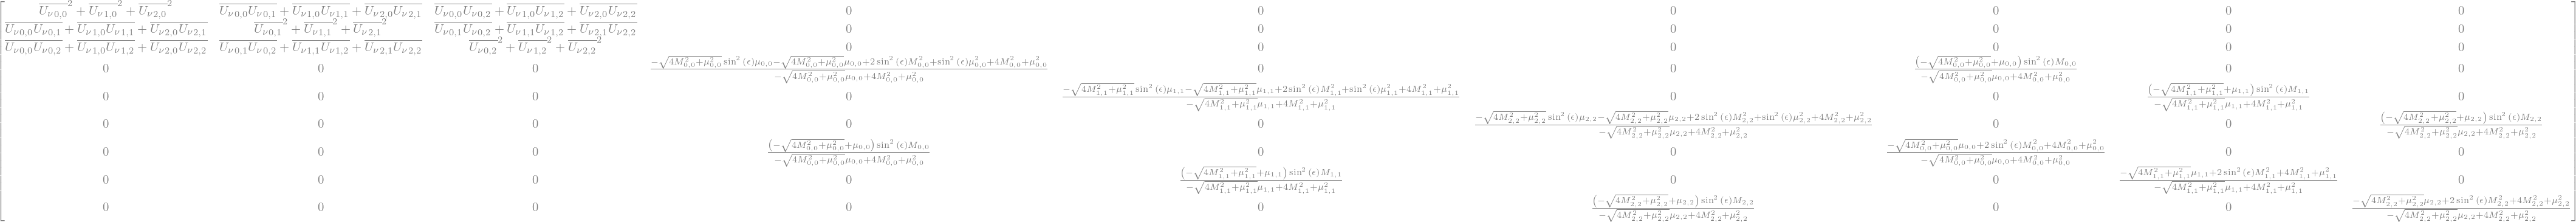

In [140]:
(U_exp2.T*U_exp2).applyfunc(lambda x:x.factor()).subs(sin(epsilon)**2 + 1, 1)

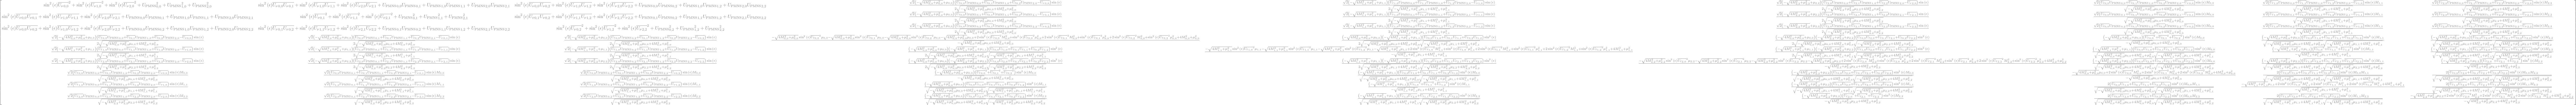

In [141]:
(Uf_exp2.T*Uf_exp2).applyfunc(lambda x:x.factor())

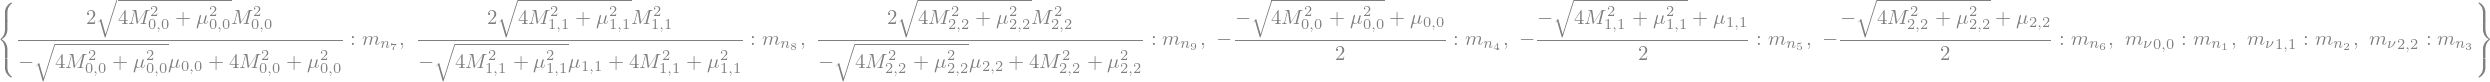

In [142]:
mNi = symbols('m_{n_1}, m_{n_2}, m_{n_3}, m_{n_4}, m_{n_5}, m_{n_6}, m_{n_7}, m_{n_8}, m_{n_9}', positive=True)
mNi_changes = {eigenvalsMnu[i,i]:mNi[i] for i in range(9)}
mNi_changes

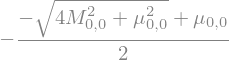

In [143]:
eigenvalsMnu[3,3]

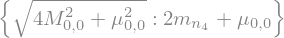

In [144]:
solve(eigenvalsMnu[3,3]-mNi[3], sqrt(mu[0,0]**2 + 4*MD[0,0]**2), dict=True)[0]

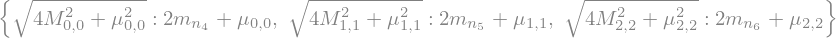

In [145]:
list0 = [solve(eigenvalsMnu[3+i,3+i]-mNi[3+i], sqrt(mu[i,i]**2 + 4*MD[i,i]**2), dict=True)[0] for i in range(3)]
dict_sqrt_muii_MDi = {
    **list0[0],
    **list0[1],
    **list0[2]
}
dict_sqrt_muii_MDi

In [146]:
#M00 = Dummy('M00') 
list1 = [solve(eigenvalsMnu[3+i,3+i]-mNi[3+i], MD[i,i]**2, dict=True)[0] for i in range(3)]
dict_Mii = {
    **list1[0],
    **list1[1],
    **list1[2]
}
dict_Mii

In [147]:
num, den = fraction((eigenvalsMnu[7,7].subs(dict_Mii) -mNi[7]))
solve(num, mu[1,1], dict=True)[0]

In [148]:
list2 = []
for i in range(3):
    print(i+6)
    num, den = fraction((eigenvalsMnu[6+i,6+i].subs(dict_Mii)-mNi[6+i]))
    sol = solve(num, mu[i,i], dict=True)[0]
    #print(sol)
    list2.append(sol)
list2

6
7
8


In [149]:
dict_muii = {
    **list2[0],
    **list2[1],
    **list2[2]
}
dict_muii

In [150]:
dict_Mii2 = {}
for key, value in dict_Mii.items():
    print(f"Key: {key}, Value: {value}")
    print("\n")
    dict_Mii2[key] = value.subs(dict_muii)



Key: M[0, 0]**2, Value: m_{n_4}*(m_{n_4} + mu[0, 0])


Key: M[1, 1]**2, Value: m_{n_5}*(m_{n_5} + mu[1, 1])


Key: M[2, 2]**2, Value: m_{n_6}*(m_{n_6} + mu[2, 2])




In [151]:
dict_Mii2

In [152]:
dict_Mii2_sqrt = {
    MD[i,i]:sqrt(dict_Mii2[MD[i,i]**2]) for i in range(3)
}
dict_Mii2_sqrt 

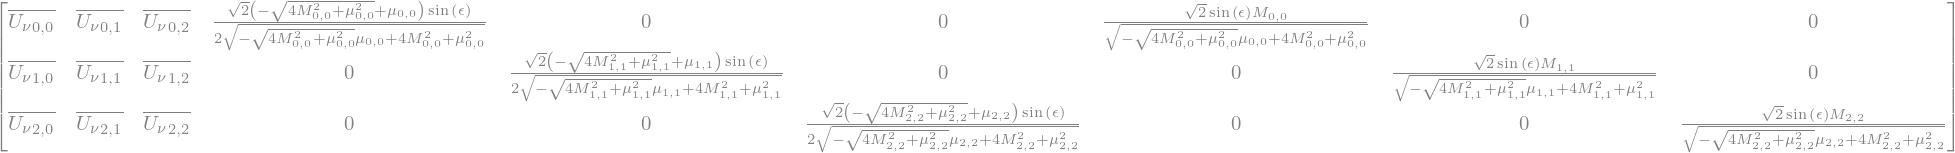

In [153]:
UL = U_exp2[:3,:]
UL

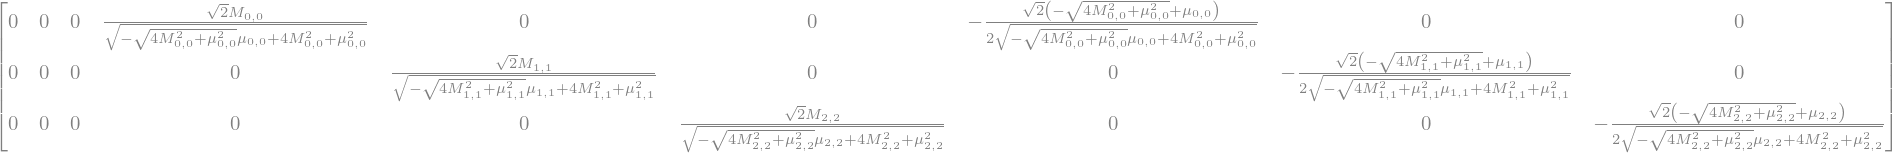

In [155]:
UR = U_exp2[3:6,:]
UR

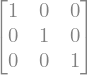

In [156]:
(UR*UR.T).applyfunc(lambda x:x.factor())

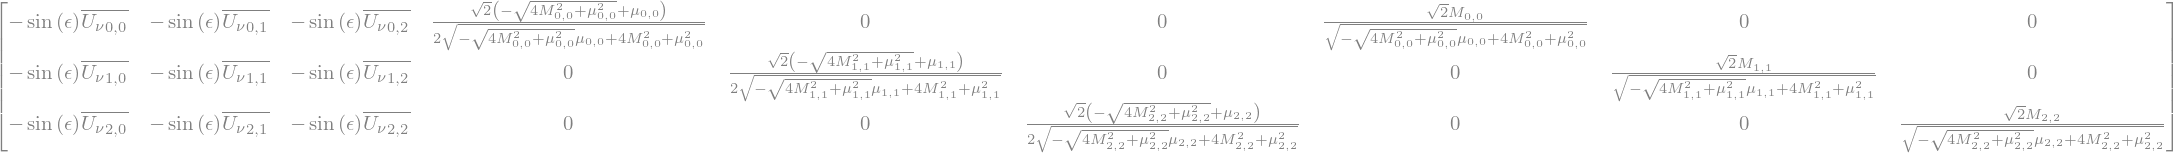

In [157]:
US = U_exp2[6:,:]
US

In [158]:
mn58 = Dummy('m_{n_{58}}', negative=True)
mn47 = Dummy('m_{n_{47}}', negative=True)
mn69 = Dummy('m_{n_{69}}', negative=True)

mns_dummys = {
    mNi[3] - mNi[6]:mn47,
    mNi[4] - mNi[7]:mn58,
    mNi[5] - mNi[8]:mn69
}
dummys_mns = {
    mn47:mNi[3] - mNi[6],
    mn58:mNi[4] - mNi[7],
    mn69:mNi[5] - mNi[8]
}

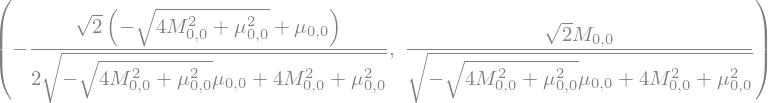

In [159]:
sinth1, costh1

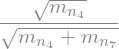

In [160]:
rs = (sinth1).subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).factor(deep=True)
rs

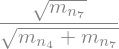

In [161]:
rc = (costh1).subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).factor(deep=True)
rc

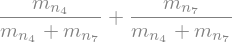

In [162]:
(rs**2 + rc**2)#.factor()

In [163]:
(rs**2 + rc**2).factor()

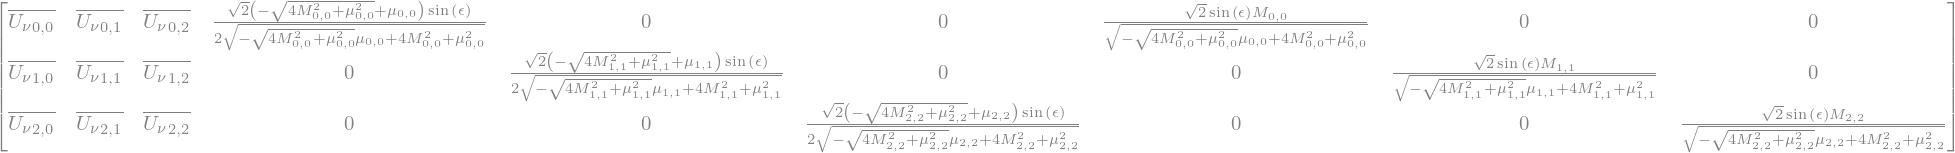

In [164]:
UL

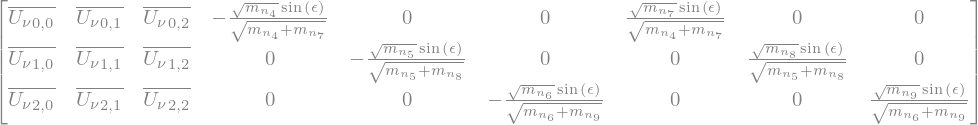

In [165]:
ULmni = UL.subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
)
#.subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
#    lambda x:x.factor(deep=True)
#).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
#    lambda x:x.factor(deep=True)
#)
ULmni

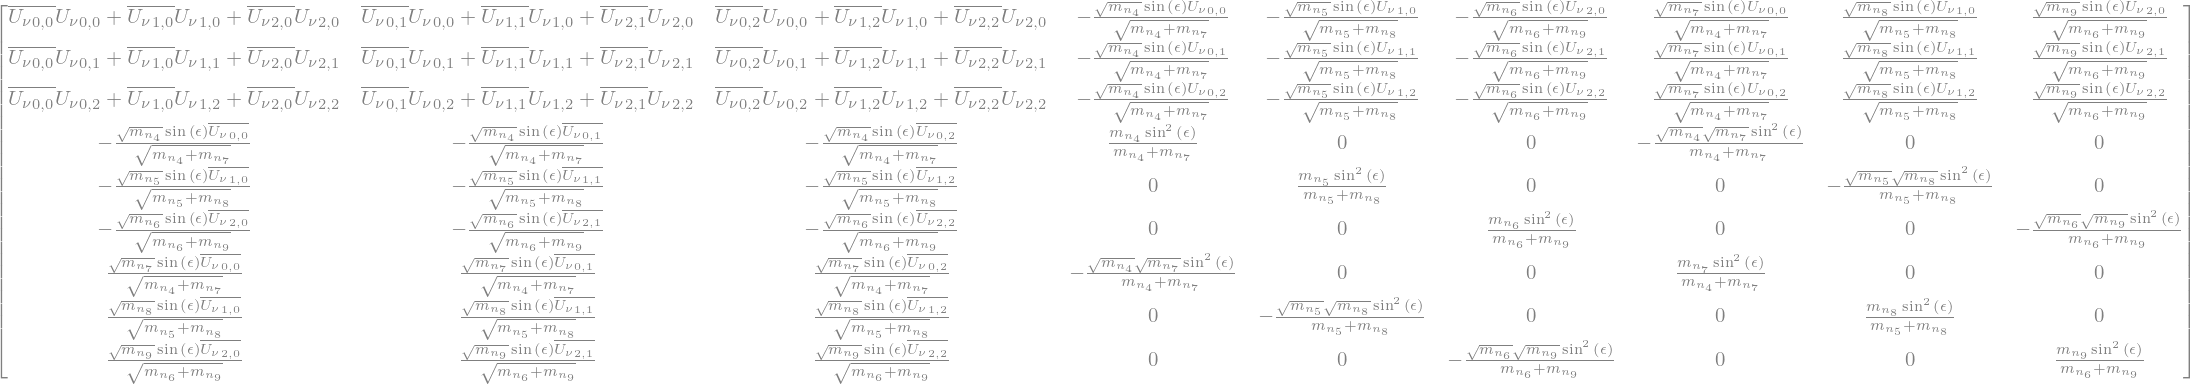

In [166]:
ULmniDULmni = Dagger(ULmni)*ULmni
ULmniDULmni

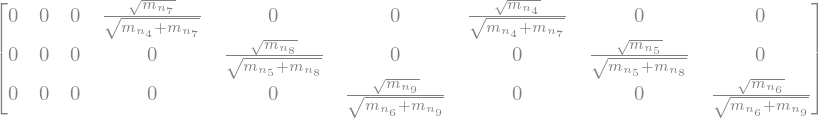

In [216]:
URmni = UR.subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
)
#.subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
#    lambda x:x.factor(deep=True)
#).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
#    lambda x:x.factor(deep=True)
#)
URmni

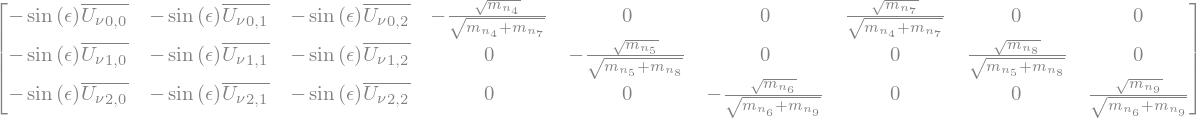

In [217]:
USmni = US.subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
)
#.subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
#    lambda x:x.factor(deep=True)
#).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
#    lambda x:x.factor(deep=True)
#)
USmni

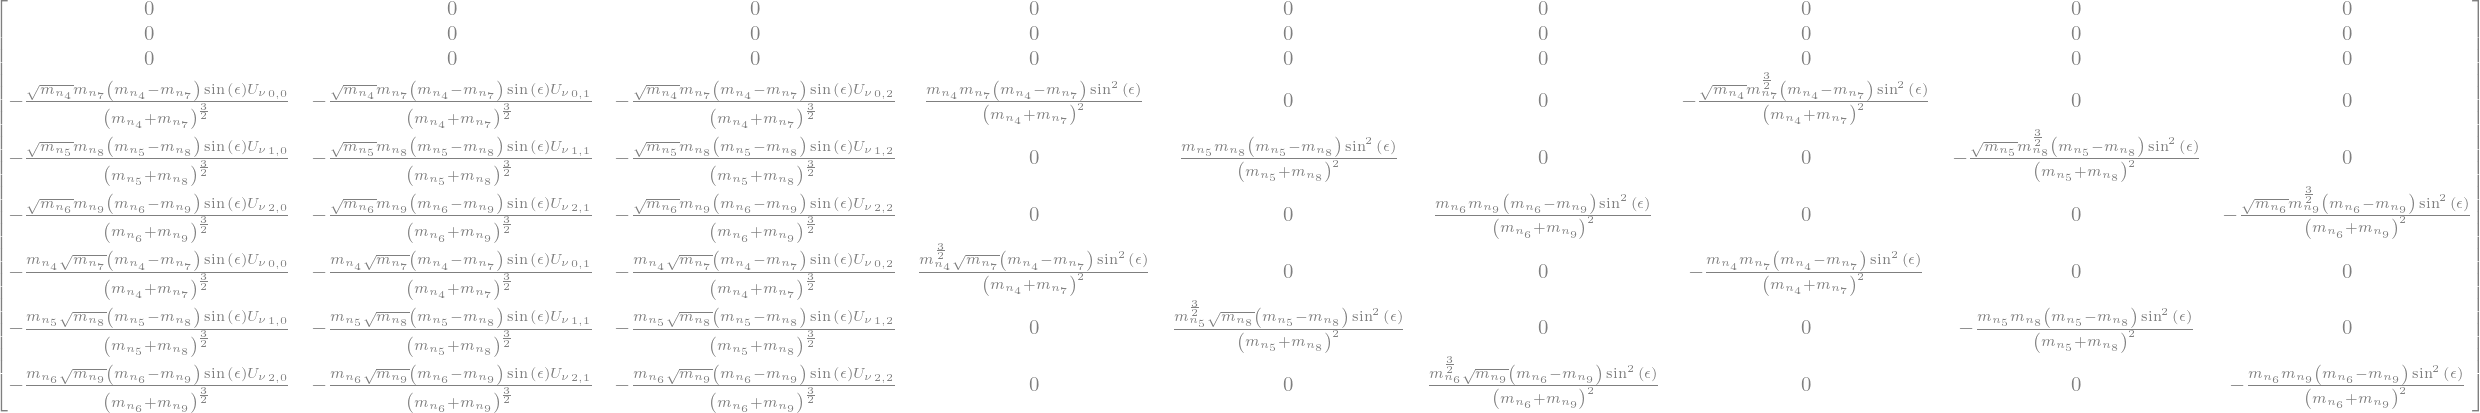

In [218]:
GRL = (URmni.T*conjugate(URmni)*(eigenvalsMnu.subs(mNi_changes))*Dagger(ULmni)*conjugate(ULmni)).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
GRL

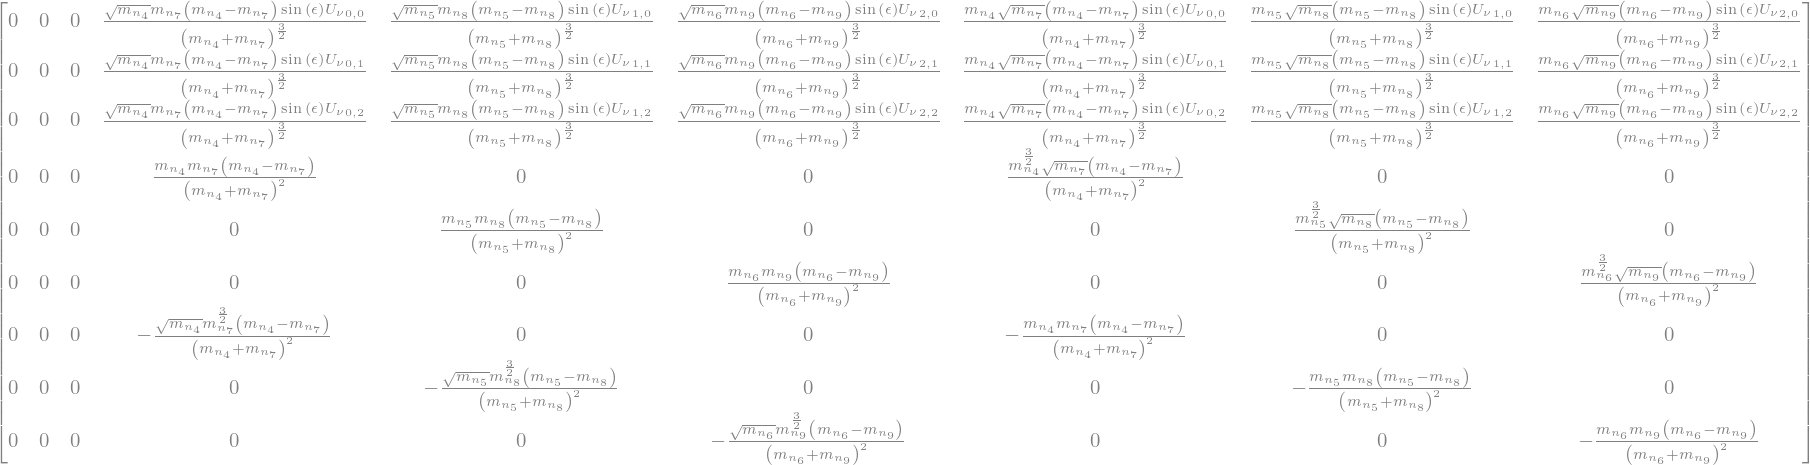

In [219]:
GSR = (Dagger(USmni)*conjugate(USmni)*(eigenvalsMnu.subs(mNi_changes))*Dagger(URmni)*conjugate(URmni)).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
GSR

In [220]:
a13, rho1 = symbols(r'\alpha_{13}, \rho_1', positive=True)

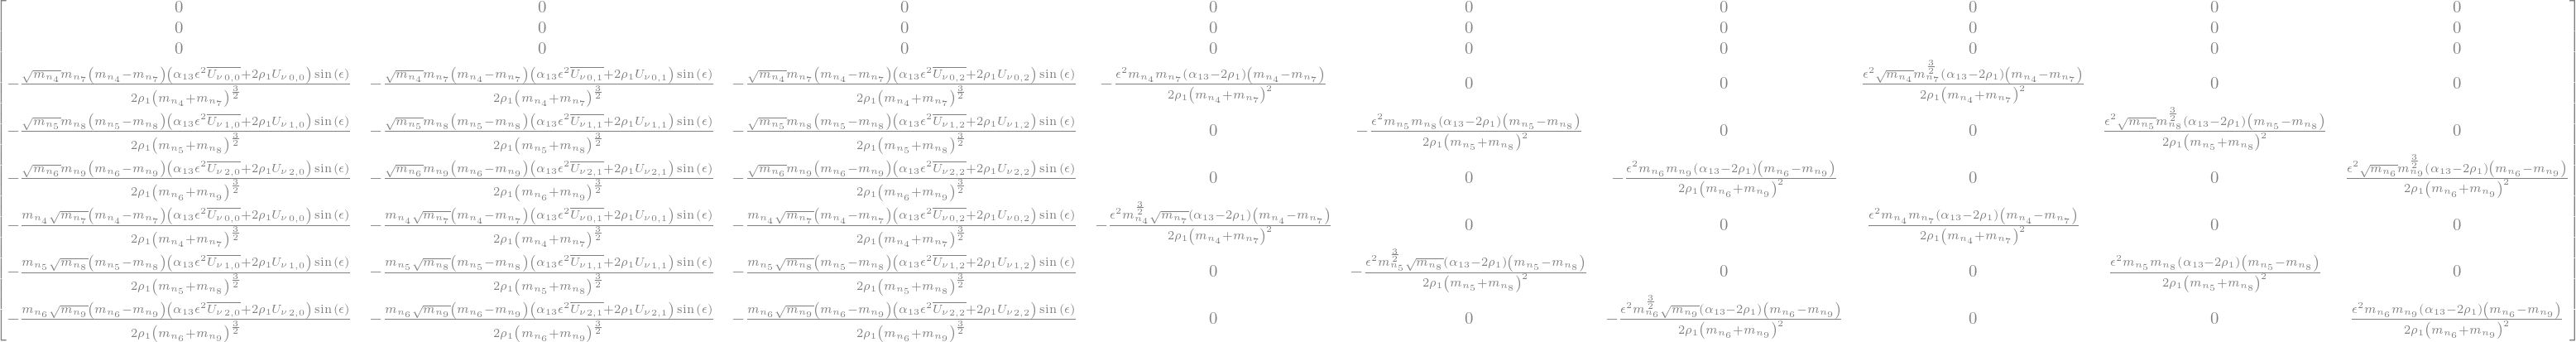

In [221]:
Gamma = (GRL - ((a13)/(2*rho1))*epsilon**2*Dagger(GSR)).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.subs(sin(epsilon)**2, epsilon**2).factor(deep=True)
)
Gamma

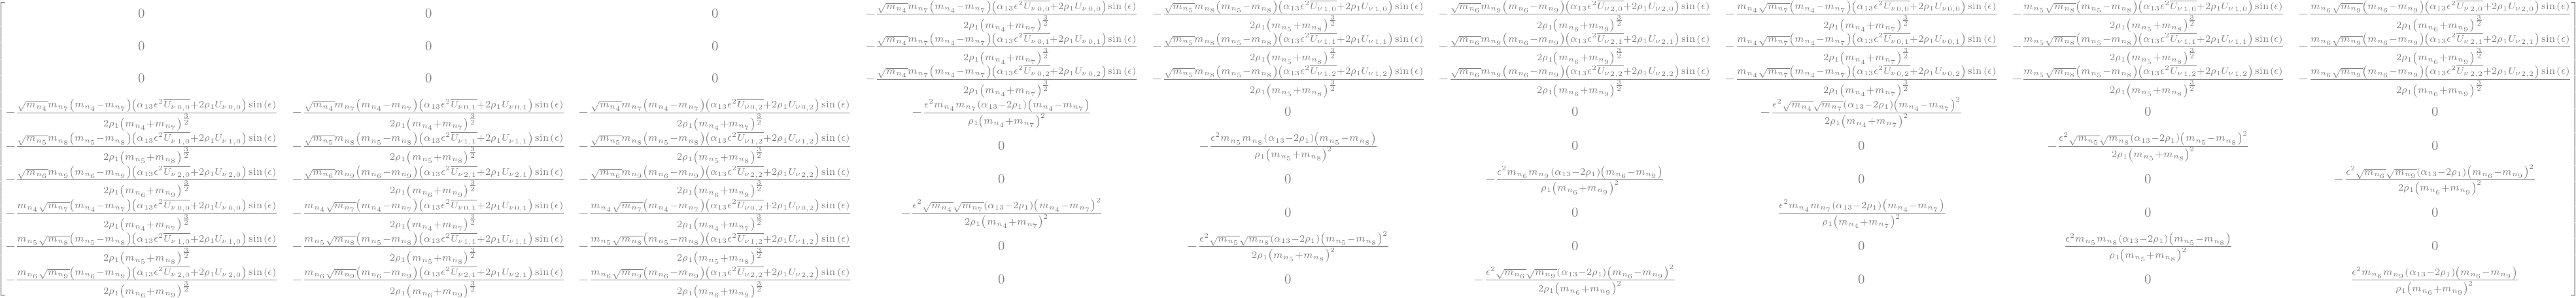

In [222]:
Omega = (Gamma + Gamma.T).applyfunc(lambda x:x.factor())#.replace(epsilon**2,0)
Omega

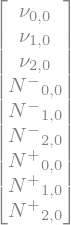

In [223]:
Nu_exp = Nu.as_explicit()
Nu_exp

In [224]:
import itertools

In [225]:
Nu_exp_list = list(itertools.chain.from_iterable(Nu_exp.tolist()))
Nu_exp_list

In [226]:
Nu_exp[0]

In [227]:
mNi

In [228]:
delta = symbols(r'\delta', positive=True)

In [229]:
eps_val = 246/5000
eps_val, eps_val**2

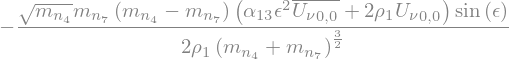

In [230]:
(Omega)[0,3]

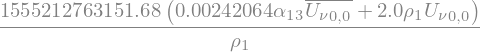

In [231]:
((Omega)[0,3]).subs(mNi[6], delta - mNi[3]).subs(mNi[3],1000).subs(delta, 1e-4).subs(epsilon, 246/5000).n()

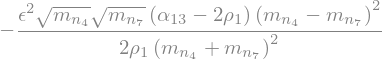

In [232]:
(Omega)[3,6]

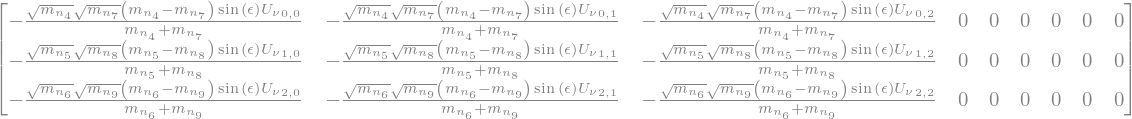

In [233]:
SRL = (conjugate(URmni)*(eigenvalsMnu.subs(mNi_changes))*Dagger(ULmni)*conjugate(ULmni)).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon)**2, 0
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
SRL

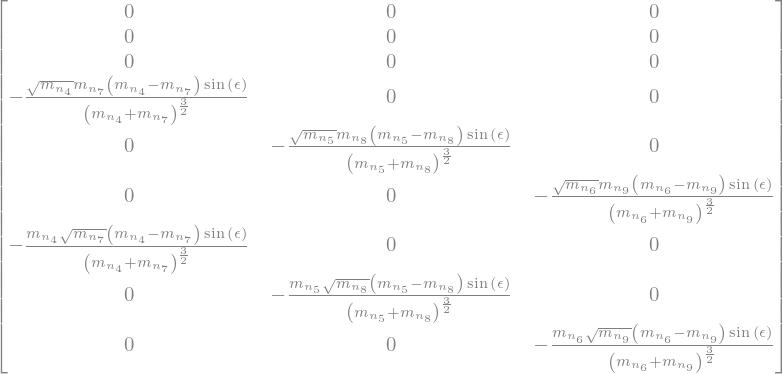

In [234]:
TRL = (URmni.T*conjugate(URmni)*(eigenvalsMnu.subs(mNi_changes))*Dagger(ULmni)).applyfunc(
    lambda x:x.factor()
).subs(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TRL

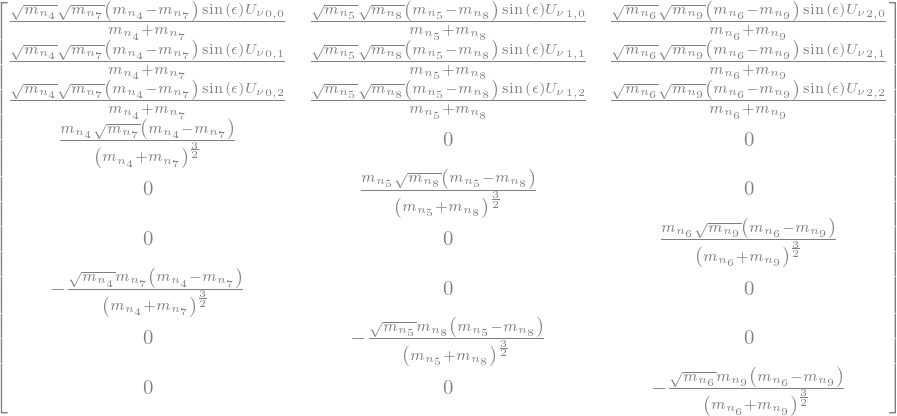

In [235]:
TSR = (Dagger(USmni)*conjugate(USmni)*(eigenvalsMnu.subs(mNi_changes))*Dagger(URmni)).applyfunc(
    lambda x:x.factor()
).subs(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TSR

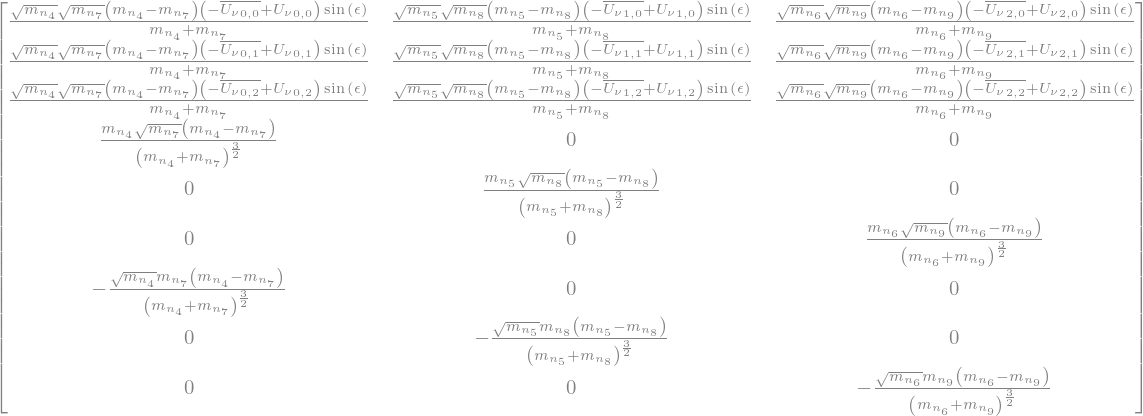

In [236]:
J = (TSR + Dagger(SRL)).applyfunc(lambda x:x.factor())
J

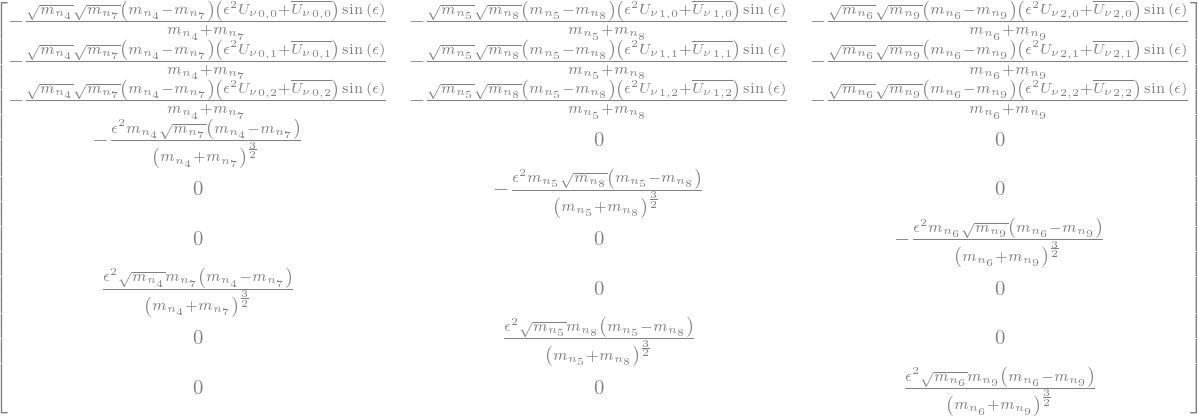

In [237]:
K = (Dagger(SRL) - epsilon**2*TSR).applyfunc(lambda x:x.factor())
K

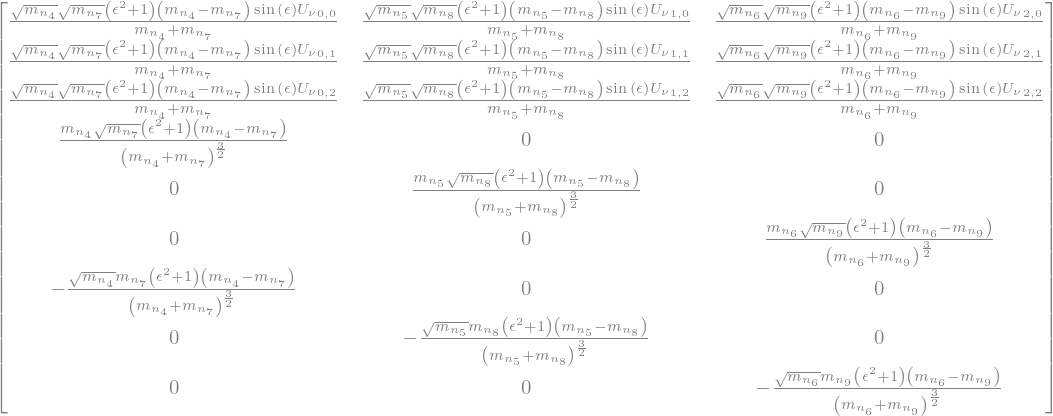

In [238]:
(J-K).applyfunc(lambda x:x.factor())

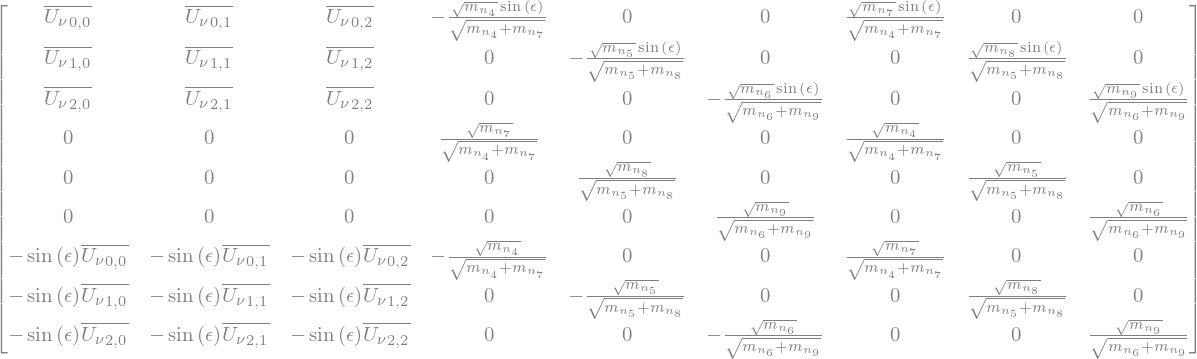

In [239]:
Umni = U_exp2.subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.factor(deep=True)
)
Umni

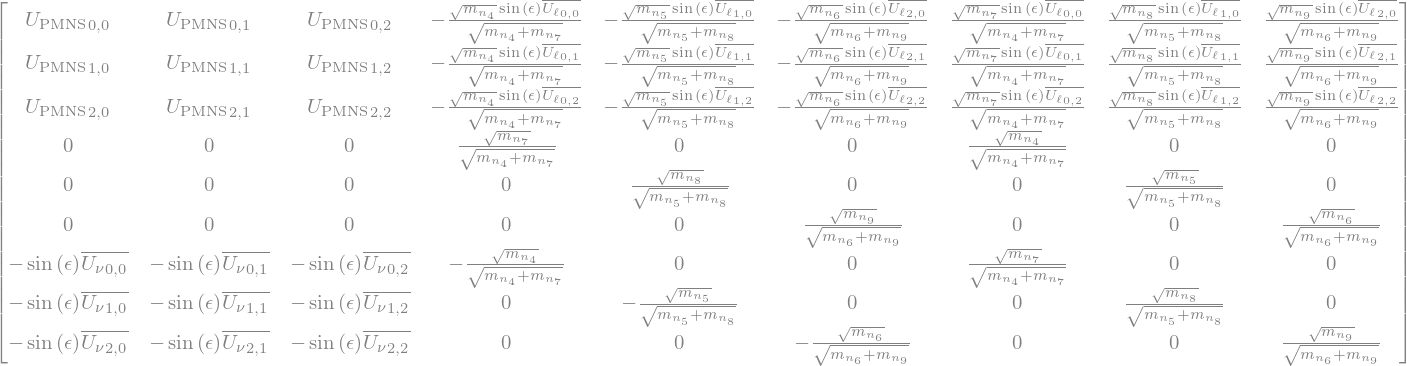

In [241]:
Ufmni = Uf_exp2.subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.factor(deep=True)
)
Ufmni

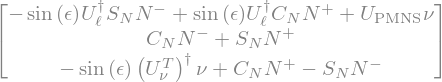

In [242]:
Nuweak = block_collapse(Uf*Nu).subs(Dagger(Ul)*conjugate(Unu), Upmns).factor()
Nuweak

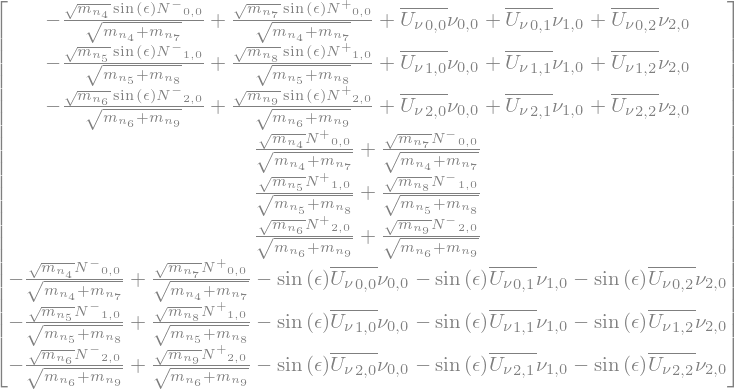

In [243]:
(Umni*Nu.as_explicit())

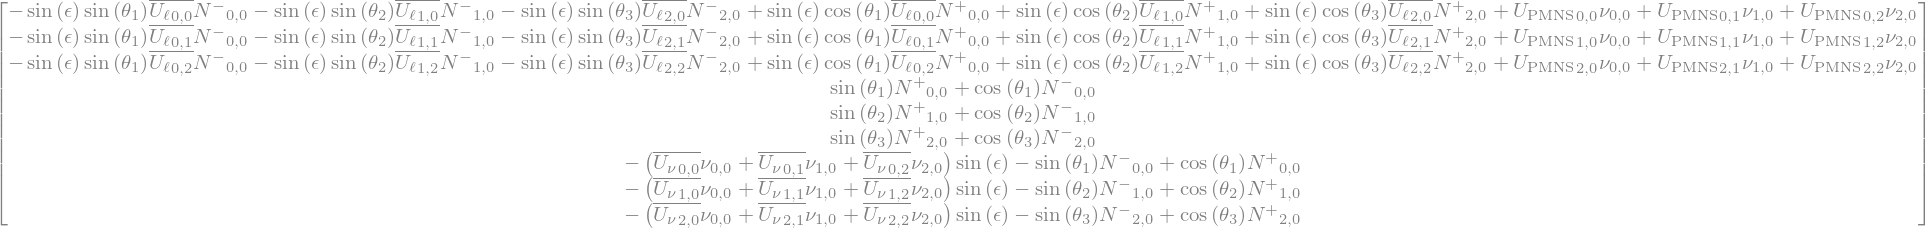

In [244]:
Nuweak_explicit = (Nuweak.subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor()))
Nuweak_explicit

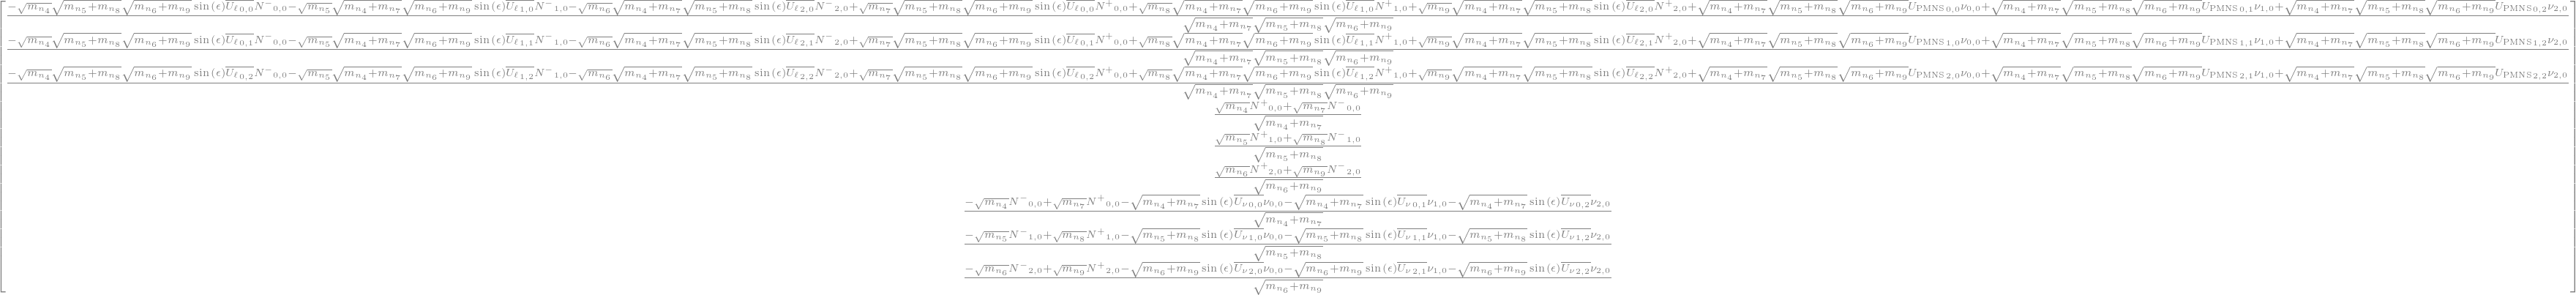

In [245]:
Nuweak_explicit.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.expand().collect([Nm[0,0], Nm[1,0], Nm[2,0]], lambda x:x.factor())).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.factor(deep=True)
)